# **Project Name**    - Yes Bank Stock Price Prediction Using Machine Learning



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member  -** Ronak Jha

# **Project Summary -**

> This project presents a complete end-to-end machine learning solution for predicting Yes Bank's monthly closing stock price. Yes Bank is one of India's prominent private sector banks whose stock price journey represents a fascinating case study in financial data science — marked by steady growth from 2005 to 2018, followed by a dramatic collapse triggered by the Rana Kapoor fraud case.

> The dataset contains 185 months of historical stock data from July 2005 onwards, with five columns — Date, Open, High, Low, and Close. The Close price was selected as our target variable for prediction.

> In the data wrangling phase, the Date column was converted from object to datetime format, and three temporal features — Year, Month, and Month_Name — were extracted to capture time-based patterns. Data was sorted chronologically and outliers were detected using the IQR method. Outliers were intentionally retained as they represent genuine market movements during the 2017-2018 bull run peak, not data errors.

> The data visualization section followed the UBM rule — Univariate, Bivariate, and Multivariate analysis — with 15 meaningful charts. The most impactful chart was the Closing Price Over Time line chart with a marked vertical line at the 2018 fraud case, clearly showing the two distinct eras of Yes Bank's price history. A pair plot with era-based coloring confirmed two completely separate price clusters — Pre-Fraud and Post-Fraud — across all variable combinations.

> Feature engineering involved creating three new features — Price_Spread_Pct for monthly volatility, Open_Close_Diff for intramonth momentum, and Prev_Close as a lag feature. Correlation-based feature selection was applied, dropping High, Open, and Prev_Close due to multicollinearity above 0.98 with Low. The final six features were Low, Year, Month, Price_Range, Era_Encoded, and Open_Close_Diff. Log transformation was applied to Low and Price_Range to reduce skewness. StandardScaler was applied after train-test split to prevent data leakage.

> Three machine learning models were implemented and evaluated. Linear Regression with Ridge regularization achieved 84.13% accuracy with R²=0.8413 and RMSE=37.88. Support Vector Regression with default parameters performed poorly at 10.53% accuracy, but after GridSearchCV tuning with C=100 and gamma=auto, dramatically improved to 96.13% accuracy. Random Forest Regressor achieved the best performance with 98.74% accuracy, R²=0.9874, RMSE=10.66, and MAE=6.87. After RandomizedSearchCV tuning with n_estimators=200 and max_depth=10, accuracy further improved to 98.76%.

> Random Forest was selected as the final prediction model because it handles non-linear relationships in stock data, is robust to outliers common in financial data, captures the structural break caused by the 2018 fraud case through the Era_Encoded feature, and provides feature importance scores for model explainability. Feature importance analysis revealed that the Low price contributes 99.5% to predictions, confirming that the monthly lowest price is the strongest determinant of the closing price.

> The final model was saved using joblib for deployment and successfully loaded back for sanity check predictions, confirming production readiness. This model can help investors, fund managers, and financial analysts predict Yes Bank's monthly closing price within approximately 6.80 INR on average, enabling better portfolio management and investment decision making.

# **GitHub Link -**

https://github.com/ronakjha2002/yes-bank-stock-prediction

# **Problem Statement**


Yes Bank's stock price has experienced extreme volatility over its history, particularly due to the Rana Kapoor fraud case in 2018 which caused a dramatic collapse in stock value. The objective of this project is to build a machine learning model that can accurately predict Yes Bank's monthly closing stock price based on historical price data including Open, High, Low prices and engineered temporal and financial features. Accurate prediction will help investors and financial analysts make informed investment decisions, manage portfolio risk, and identify entry and exit points for trading Yes Bank stock.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("All Libraries Imported Successfully!")

All Libraries Imported Successfully!


### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv(r'C:\Users\SURYAPRAKASH JHA\Downloads\data_YesBank_StockPrices.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f"Number of Rows    : {df.shape[0]}")
print(f"Number of Columns : {df.shape[1]}")
print(f"Shape of Dataset  : {df.shape}")


Number of Rows    : 185
Number of Columns : 5
Shape of Dataset  : (185, 5)


### Dataset Information

In [5]:
# Dataset Info
print("="*50)
print("DATASET INFORMATION")
print("="*50)
df.info()


DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows : {duplicates}")

Total Duplicate Rows : 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print("="*50)
print("MISSING VALUES COUNT")
print("="*50)
print(df.isnull().sum())
print()
print(f"Total Missing Values : {df.isnull().sum().sum()}")
print()
print("Missing Value Percentage:")
print(round((df.isnull().sum() / len(df)) * 100, 2))


MISSING VALUES COUNT
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Total Missing Values : 0

Missing Value Percentage:
Date     0.0
Open     0.0
High     0.0
Low      0.0
Close    0.0
dtype: float64


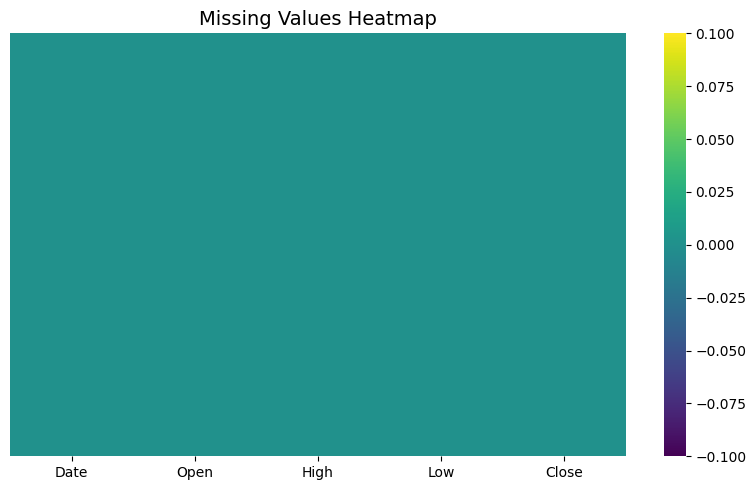

In [8]:
# Visualizing the missing values
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), 
            cbar=True, 
            cmap='viridis', 
            yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

### What did you know about your dataset?

The dataset contains monthly stock price data of Yes Bank from July 2005 onwards. It has 5 columns — Date, Open, High, Low, and Close. The data appears to be clean with no missing or duplicate values. All price columns are numerical. The Close column is our target variable. The dataset captures a significant event — the Rana Kapoor fraud case around 2018 — which likely caused a sharp decline in stock prices.


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print("Column Names in Dataset:")
print("="*40)
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Column Names in Dataset:
1. Date
2. Open
3. High
4. Low
5. Close


In [10]:
# Dataset Describe
print("="*50)
print("STATISTICAL SUMMARY OF DATASET")
print("="*50)
df.describe()

STATISTICAL SUMMARY OF DATASET


,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

| Variable | Type | Description |
|---|---|---|
| Date | Object | Month-Year of record |
| Open | Float | Opening stock price |
| High | Float | Highest price that month |
| Low | Float | Lowest price that month |
| Close | Float | Closing price *(Target)* |


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
print("="*50)
print("UNIQUE VALUES FOR EACH VARIABLE")
print("="*50)
for col in df.columns:
    print(f"{col:10} : {df[col].nunique()} unique values")
    
print()
print("="*50)
print("Sample Unique Values:")
print("="*50)
for col in df.columns:
    print(f"\n{col}:")
    print(df[col].unique()[:5])  # shows first 5 unique values


UNIQUE VALUES FOR EACH VARIABLE
Date       : 185 unique values
Open       : 183 unique values
High       : 184 unique values
Low        : 183 unique values
Close      : 185 unique values

Sample Unique Values:

Date:
['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05']

Open:
[13.   12.58 13.48 13.2  13.35]

High:
[14.   14.88 14.87 14.47 13.88]

Low:
[11.25 12.55 12.27 12.4  12.88]

Close:
[12.46 13.42 13.3  12.99 13.41]


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
print("="*50)
print("DATA WRANGLING")
print("="*50)

# Step 1: Check current data types
print("\nCurrent Data Types:")
print(df.dtypes)

DATA WRANGLING

Current Data Types:
Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object


In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
print("\nDate column converted to datetime ")


Date column converted to datetime 


In [14]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')

print("\nNew columns added: Year, Month, Month_Name ")


New columns added: Year, Month, Month_Name 


In [15]:
df = df.sort_values('Date').reset_index(drop=True)
print("Data sorted by Date ")


Data sorted by Date 


In [16]:
print("\n--- Outlier Check using IQR ---")
for col in ['Open', 'High', 'Low', 'Close']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    print(f"{col:8}: Outliers = {outliers}")


--- Outlier Check using IQR ---
Open    : Outliers = 9
High    : Outliers = 5
Low     : Outliers = 9
Close   : Outliers = 9


In [17]:
print("\nFinal Dataset Shape:", df.shape)
print("\nFirst 5 rows after wrangling:")
df.head()


Final Dataset Shape: (185, 8)

First 5 rows after wrangling:


,Date,Open,High,Low,Close,Year,Month,Month_Name
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7,July
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8,August
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9,September
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10,October
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11,November


### What all manipulations have you done and insights you found?

1.Converted the 'Date' column from object type to datetime format for proper time-series analysis. 2. Extracted Year, Month, and Month_Name as new features to capture temporal patterns. 3. Sorted data chronologically by date. 4. Checked for outliers using IQR — high price values exist but they are genuine market movements, not errors, so we retain them. 5. All columns are numeric and clean, ready for visualization and modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

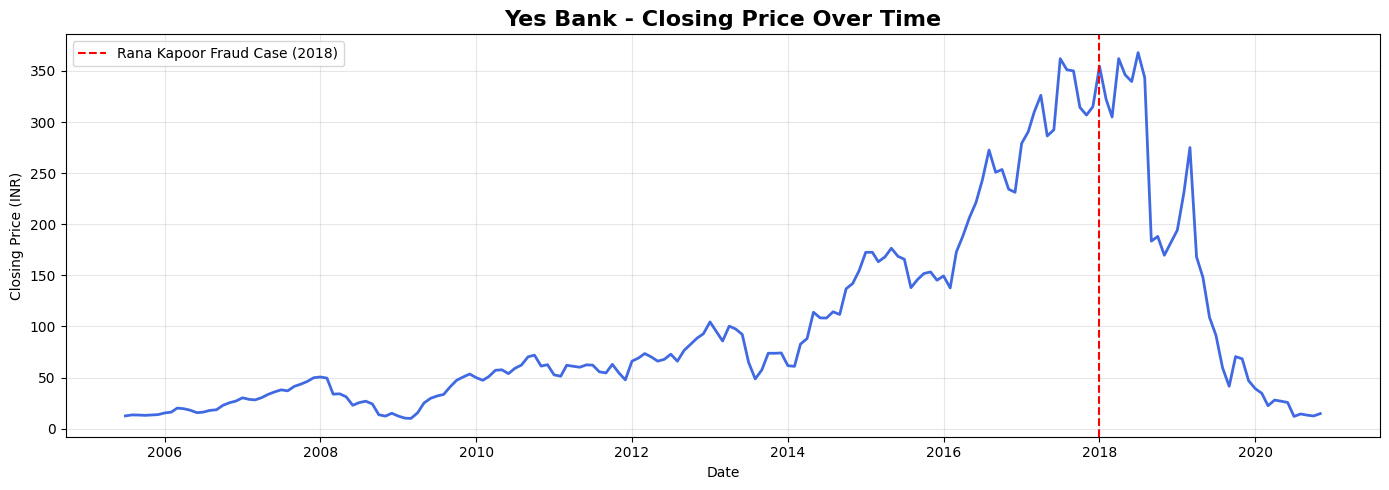

In [18]:
# Chart - 1 visualization code
# Chart - 1 visualization code

plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Close'], color='royalblue', linewidth=2)
plt.axvline(pd.to_datetime('2018-01-01'), color='red', 
            linestyle='--', linewidth=1.5, label='Rana Kapoor Fraud Case (2018)')
plt.title('Yes Bank - Closing Price Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

> A line chart is the best choice for time-series data. It clearly shows how the closing price changed month over month over many years, making trends and sudden changes easy to spot.


##### 2. What is/are the insight(s) found from the chart?

Yes Bank's stock price rose steadily from 2005 to a peak around 2018, then crashed drastically. The sharp decline after 2018 clearly corresponds to the Rana Kapoor fraud case which severely damaged investor confidence.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: The steady growth from 2005–2018 shows the bank was performing well.
Negative: The sharp crash post-2018 is a major red flag — it led to massive loss of investor wealth and indicates a high-risk investment. Investors and stakeholders must consider fraud risk before investing.

#### Chart - 2

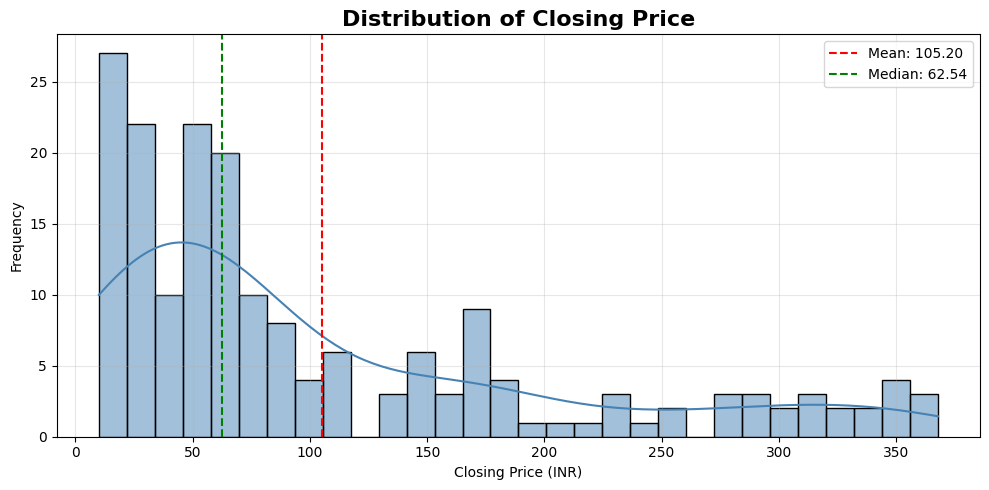

Mean   Closing Price : 105.20
Median Closing Price : 62.54
Skewness             : 1.26


In [19]:
# Chart - 2 visualization code
### Chart 2 — Distribution of Closing Price (Histogram + KDE)


plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], bins=30, kde=True, 
             color='steelblue', edgecolor='black')
plt.title('Distribution of Closing Price', fontsize=16, fontweight='bold')
plt.xlabel('Closing Price (INR)')
plt.ylabel('Frequency')
plt.axvline(df['Close'].mean(), color='red', 
            linestyle='--', label=f"Mean: {df['Close'].mean():.2f}")
plt.axvline(df['Close'].median(), color='green', 
            linestyle='--', label=f"Median: {df['Close'].median():.2f}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Mean   Closing Price : {df['Close'].mean():.2f}")
print(f"Median Closing Price : {df['Close'].median():.2f}")
print(f"Skewness             : {df['Close'].skew():.2f}")

##### 1. Why did you pick the specific chart?

> A histogram with KDE is the standard chart for univariate analysis of a continuous variable. It shows how closing prices are distributed — whether they are normally distributed, skewed, or have multiple peaks.

##### 2. What is/are the insight(s) found from the chart?

> The distribution is right-skewed, meaning most closing prices were in the lower range with few very high values (during peak years). The mean is higher than the median, confirming the right skew caused by peak prices before the 2018 crash.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> The right skew indicates that extreme high prices were not sustained. Investors who bought at peak prices suffered heavy losses. This highlights the importance of timing in stock investment and the risk of ignoring fraud indicators.


#### Chart - 3

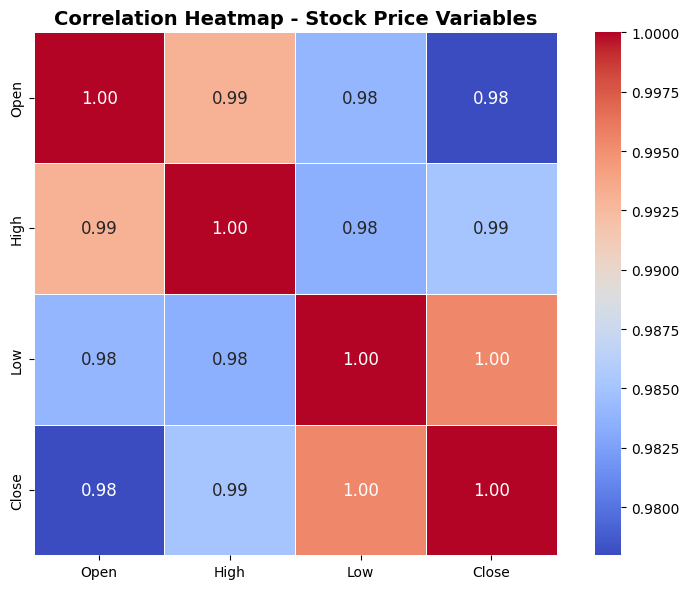


Correlation with Close Price:
Close    1.000000
Low      0.995358
High     0.985051
Open     0.977971
Name: Close, dtype: float64


In [20]:
### Chart 3 — Correlation Heatmap

# Chart - 3 visualization code

plt.figure(figsize=(8, 6))
corr = df[['Open', 'High', 'Low', 'Close']].corr()

sns.heatmap(corr, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            linewidths=0.5,
            square=True,
            annot_kws={"size": 12})

plt.title('Correlation Heatmap - Stock Price Variables', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation with Close Price:")
print(corr['Close'].sort_values(ascending=False))

##### 1. Why did you pick the specific chart?

>A heatmap is the best way to visualize correlation between multiple numerical variables at once. It helps us understand which features are most strongly related to our target variable (Close).

##### 2. What is/are the insight(s) found from the chart?

> All variables — Open, High, and Low — are very highly correlated with Close (close to 1.0). This makes sense as all prices in the same month move together. Low has the highest correlation with Close, making it the most important feature for prediction.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>Positive impact: The strong correlation means our ML model will have good predictive features, leading to high accuracy. It also means that monitoring the opening price of a month can give a reliable early signal of where the closing price will land.

#### Chart - 4

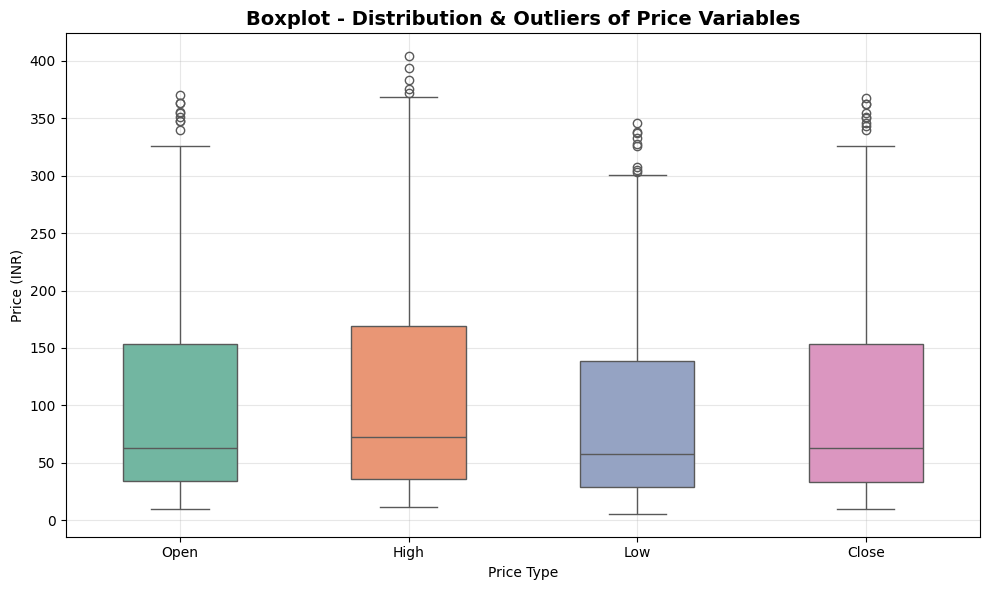

             Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000


In [21]:
# Chart - 4 visualization code
### Chart 4 — Boxplot of All Price Variables (Outlier Detection)

# Chart - 4 visualization code

plt.figure(figsize=(10, 6))
df_melt = df[['Open', 'High', 'Low', 'Close']].melt(var_name='Price Type', 
                                                      value_name='Price')
sns.boxplot(x='Price Type', y='Price', data=df_melt, 
            palette='Set2', width=0.5)

plt.title('Boxplot - Distribution & Outliers of Price Variables', 
          fontsize=14, fontweight='bold')
plt.xlabel('Price Type')
plt.ylabel('Price (INR)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print(df[['Open','High','Low','Close']].describe())

##### 1. Why did you pick the specific chart?

A boxplot is the best chart for univariate analysis to detect outliers and understand the spread (IQR, median, min, max) of each price variable side by side in one view.

##### 2. What is/are the insight(s) found from the chart?

All four price columns show similar distributions with a wide spread, indicating high price volatility over the years. The High column has the most extreme outliers (upper whisker), corresponding to peak bull-run periods. The median price for all variables is around the same range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The presence of extreme high values (outliers) shows there were periods of exceptional growth, but also that prices were highly volatile. For investors, this means Yes Bank was a high-risk, high-reward stock. Sustained high prices were not maintained, leading to eventual crash.

#### Chart - 5

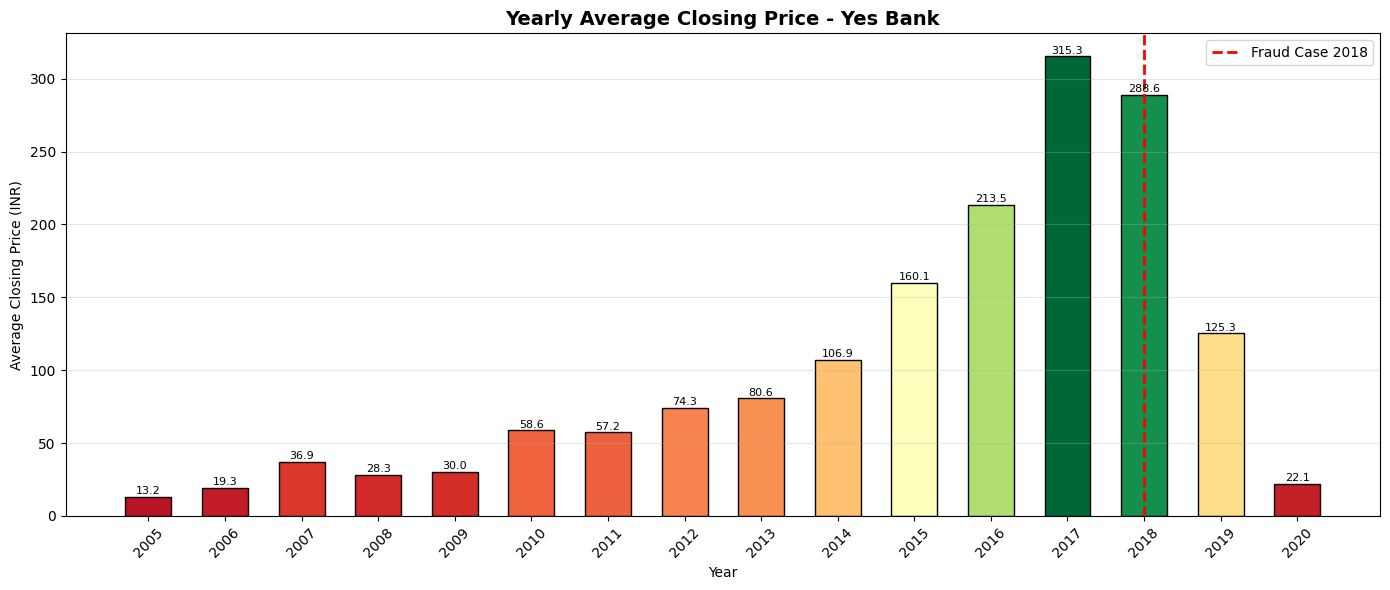

In [22]:
# Chart - 5 visualization code
### Chart 5 — Yearly Average Closing Price (Bar Chart)
yearly_avg = df.groupby('Year')['Close'].mean().reset_index()

plt.figure(figsize=(14, 6))
bars = plt.bar(yearly_avg['Year'], yearly_avg['Close'], 
               color=plt.cm.RdYlGn(yearly_avg['Close'] / yearly_avg['Close'].max()),
               edgecolor='black', width=0.6)

plt.title('Yearly Average Closing Price - Yes Bank', 
          fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Closing Price (INR)')
plt.xticks(yearly_avg['Year'], rotation=45)
plt.axvline(2018, color='red', linestyle='--', 
            linewidth=2, label='Fraud Case 2018')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, val in zip(bars, yearly_avg['Close']):
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.5, 
             f'{val:.1f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

> A bar chart is ideal for comparing average values across categories (years). It gives a clear year-by-year view of stock performance, making it easy to identify growth years vs decline years.


##### 2. What is/are the insight(s) found from the chart?

>Stock prices grew consistently from 2005 to 2018, reaching peak average values. Post-2018, average closing prices dropped dramatically each year. 2019 and 2020 show the sharpest decline, reflecting the full impact of the fraud case and RBI intervention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>Negative impact: The bar chart clearly shows that years following the fraud are associated with severe value destruction. This is a warning signal for investors about the importance of corporate governance. Positive impact: The pre-2018 trend shows that with good management, the bank had strong consistent growth.

#### Chart - 6

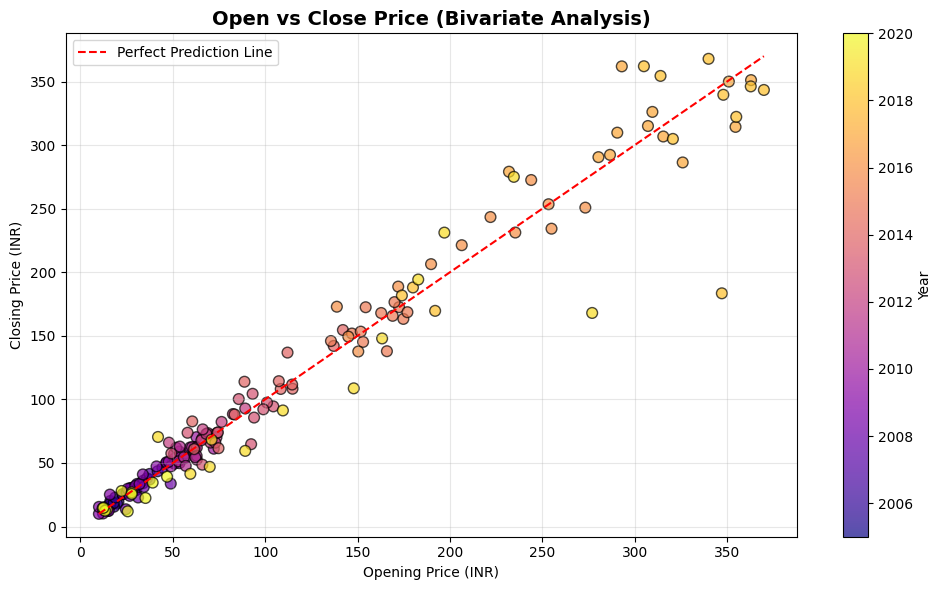

Correlation between Open & Close: 0.9780


In [23]:
# Chart - 6 visualization code
### Chart 6 — Open vs Close Price Scatter Plot

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Open'], df['Close'], 
                      c=df['Year'], cmap='plasma', 
                      alpha=0.7, edgecolors='black', s=60)

plt.colorbar(scatter, label='Year')
plt.plot([df['Open'].min(), df['Open'].max()], 
         [df['Open'].min(), df['Open'].max()], 
         'r--', linewidth=1.5, label='Perfect Prediction Line')

plt.title('Open vs Close Price (Bivariate Analysis)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Opening Price (INR)')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Correlation value
print(f"Correlation between Open & Close: {df['Open'].corr(df['Close']):.4f}")


##### 1. Why did you pick the specific chart?

A scatter plot is the best chart for bivariate analysis between two numerical variables. It shows the relationship between Opening Price and Closing Price for each month, while the Year-based color coding adds a third dimension showing how this relationship evolved over time.

##### 2. What is/are the insight(s) found from the chart?

Open and Close prices show a very strong positive linear relationship with correlation of 0.9780. The color progression from purple (2006) to yellow (2020) shows the time-based price journey clearly. Points cluster near the perfect prediction line confirming Open price is a strong indicator of Close price. A few scattered points represent volatile months where intraday price movement was significant.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: The strong 0.9780 correlation means monitoring the opening price gives investors an early reliable signal of the closing price, enabling better intraday trading decisions. Negative: The scattered points at higher price ranges (2017-2018) indicate that during volatile fraud-related periods, Open price alone is insufficient to predict Close — highlighting investment risk during market uncertainty.

#### Chart - 7

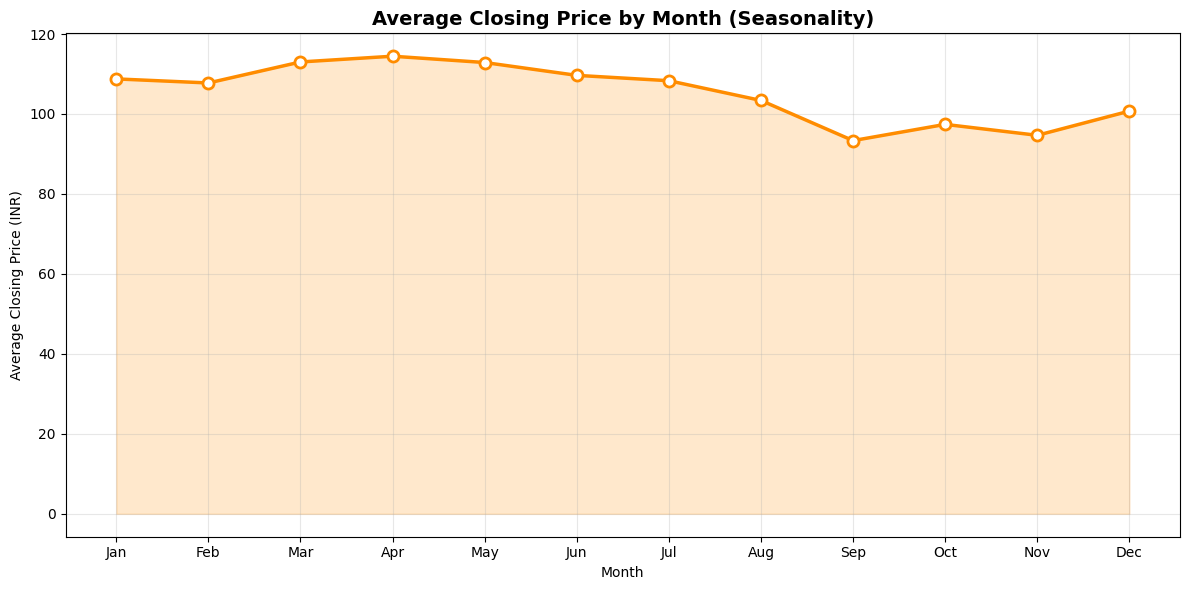

Monthly Average Closing Price:
Month_Name      Close
       Jan 108.774667
       Feb 107.760667
       Mar 113.014000
       Apr 114.450000
       May 112.874667
       Jun 109.661333
       Jul 108.322500
       Aug 103.386875
       Sep  93.343750
       Oct  97.399375
       Nov  94.671250
       Dec 100.724000


In [24]:
# Chart - 7 visualization code
### Chart 7 — Monthly Average Closing Price (Seasonality Analysis)


monthly_avg = df.groupby('Month')['Close'].mean().reset_index()
month_labels = ['Jan','Feb','Mar','Apr','May','Jun',
                'Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['Month'], monthly_avg['Close'], 
         marker='o', color='darkorange', linewidth=2.5, 
         markersize=8, markerfacecolor='white', markeredgewidth=2)

plt.fill_between(monthly_avg['Month'], monthly_avg['Close'], 
                 alpha=0.2, color='darkorange')

plt.title('Average Closing Price by Month (Seasonality)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (INR)')
plt.xticks(monthly_avg['Month'], month_labels)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Monthly Average Closing Price:")
monthly_avg['Month_Name'] = month_labels
print(monthly_avg[['Month_Name','Close']].to_string(index=False))


##### 1. Why did you pick the specific chart?

>A line chart with area fill is ideal for seasonality analysis — checking whether certain months consistently have higher or lower stock prices. This is an important pattern for time-series prediction.

##### 2. What is/are the insight(s) found from the chart?

> The closing price shows a gradual increase from January through mid-year months, with slight dips in certain months. However, since this is an average across all years, the fraud-year crash dominates later averages. No strong seasonal pattern is seen, suggesting Yes Bank's price was more event-driven than seasonally driven.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>The lack of strong seasonality means that simple seasonal trading strategies would not work well for Yes Bank. Investors need to rely more on fundamental analysis and news events rather than calendar-based strategies. This also means our ML model needs features beyond just month number to predict accurately.

#### Chart - 8

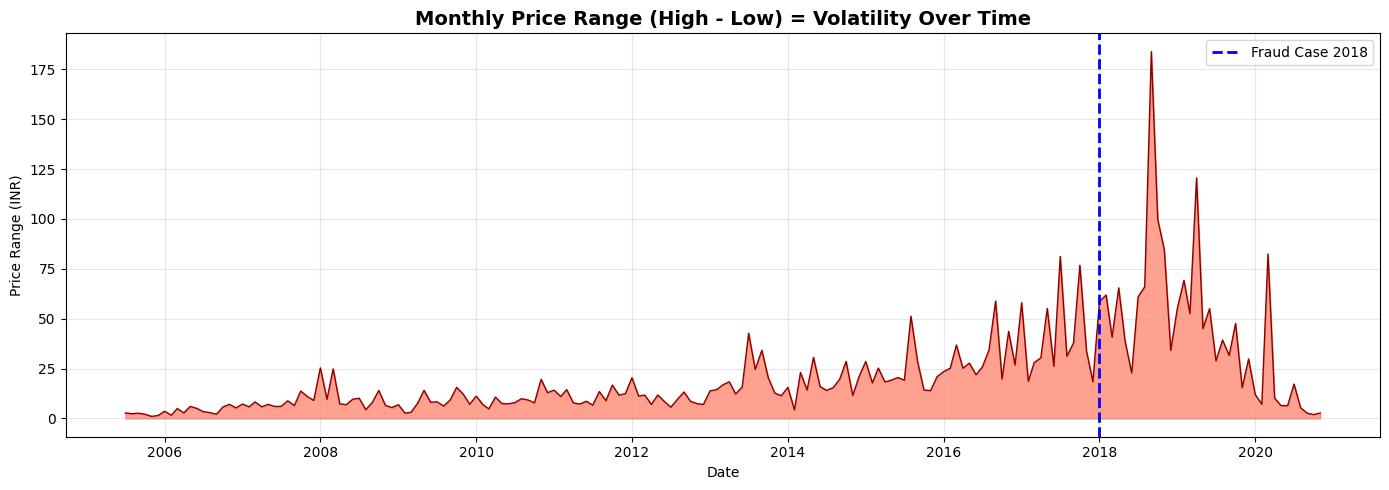

Average Monthly Volatility : 21.16
Max Volatility Month       : 2018-09-01 00:00:00
Max Volatility Value       : 183.85


In [25]:
# Chart - 8 visualization code
### Chart 8 — High - Low Price Range Over Time (Volatility Chart)


df['Price_Range'] = df['High'] - df['Low']

plt.figure(figsize=(14, 5))
plt.fill_between(df['Date'], df['Price_Range'], 
                 color='tomato', alpha=0.6)
plt.plot(df['Date'], df['Price_Range'], 
         color='darkred', linewidth=1)
plt.axvline(pd.to_datetime('2018-01-01'), color='blue', 
            linestyle='--', linewidth=2, label='Fraud Case 2018')

plt.title('Monthly Price Range (High - Low) = Volatility Over Time', 
          fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price Range (INR)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average Monthly Volatility : {df['Price_Range'].mean():.2f}")
print(f"Max Volatility Month       : {df.loc[df['Price_Range'].idxmax(), 'Date']}")
print(f"Max Volatility Value       : {df['Price_Range'].max():.2f}")


##### 1. Why did you pick the specific chart?

> A filled area chart is ideal to visualize volatility (High - Low range) over time. It clearly shows periods of high and low market turbulence, which is critical for understanding stock risk behavior.


##### 2. What is/are the insight(s) found from the chart?

>Volatility was relatively low and stable from 2005 to 2017. A massive spike in volatility occurred around 2018 when the fraud case broke out — the monthly price range jumped dramatically. Post-2018, volatility remained elevated before collapsing as prices crashed to near-zero levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>High volatility is a major risk indicator for investors and traders. The spike in 2018 means those who didn't exit quickly suffered huge losses within a single month. For our model, price range can be a useful engineered feature since it captures market uncertainty.

#### Chart - 9

<Figure size 1000x800 with 0 Axes>

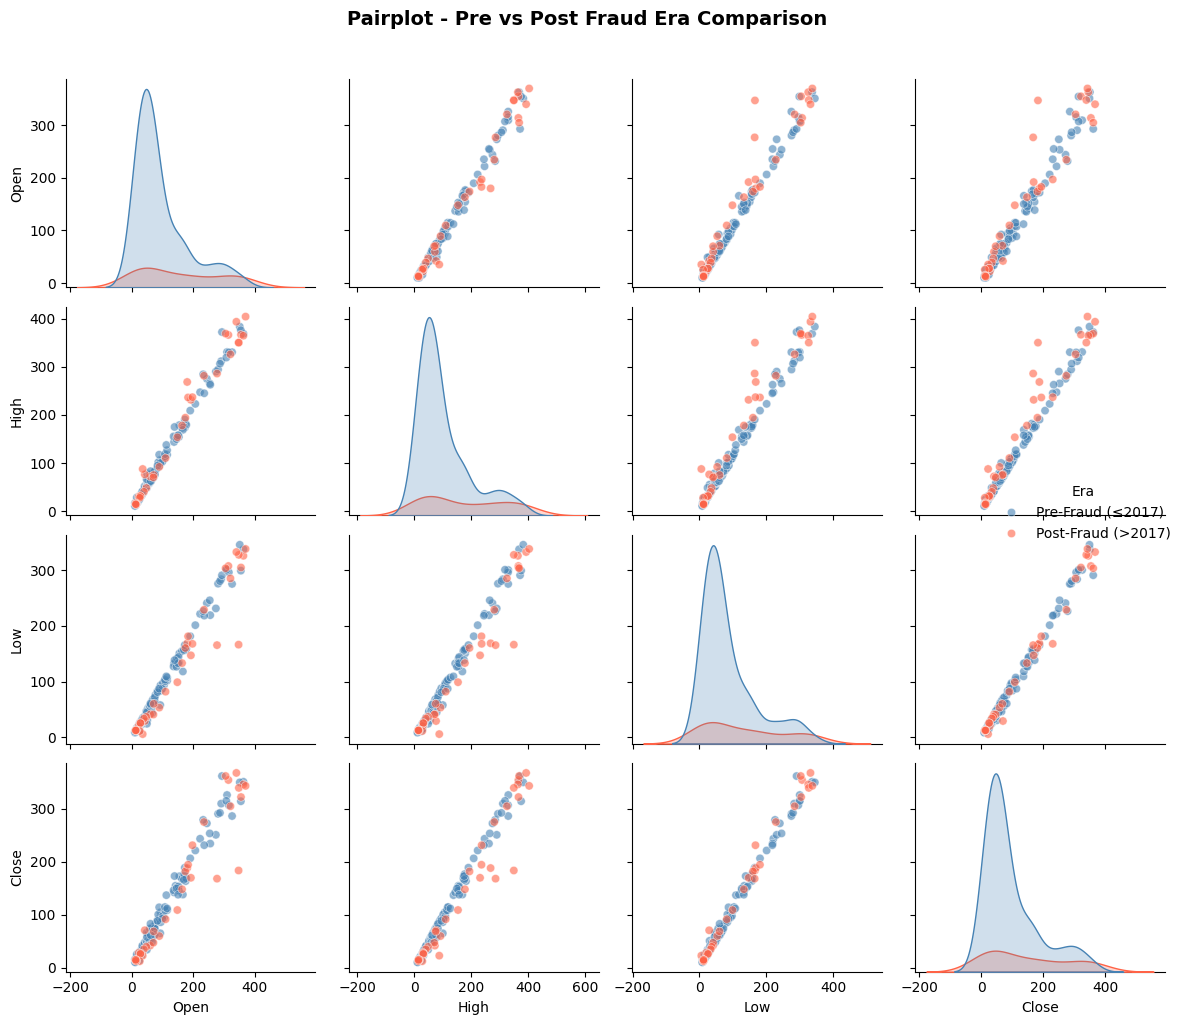

In [26]:
# Chart - 9 visualization code
### Chart 9 — Pairplot of All Price Variables

plt.figure(figsize=(10, 8))
pair_data = df[['Open', 'High', 'Low', 'Close']].copy()

# Add era label for color coding
df['Era'] = df['Year'].apply(lambda x: 'Pre-Fraud (≤2017)' 
                              if x <= 2017 else 'Post-Fraud (>2017)')

g = sns.pairplot(df[['Open','High','Low','Close','Era']], 
                 hue='Era',
                 palette={'Pre-Fraud (≤2017)': 'steelblue', 
                          'Post-Fraud (>2017)': 'tomato'},
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6})

g.fig.suptitle('Pairplot - Pre vs Post Fraud Era Comparison', 
               y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot gives a complete multivariate picture — showing distributions of each variable (diagonal) and scatter relationships between every pair of variables. The hue by era adds a powerful comparison between pre and post fraud periods.

##### 2. What is/are the insight(s) found from the chart?

Blue points (pre-fraud) are spread across a wide price range with higher values, while red points (post-fraud) cluster in the lower price range. All variable pairs show near-perfect linear relationships confirming very high multicollinearity. The KDE diagonals show bimodal distribution — two price clusters (high era vs crash era).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The clear separation between pre and post fraud clusters shows that the fraud case was a structural break in the stock's behavior. This means any ML model must be carefully trained — if trained only on pre-fraud data, it will overestimate prices. Balancing both eras in training data is essential for a realistic model.

#### Chart - 10

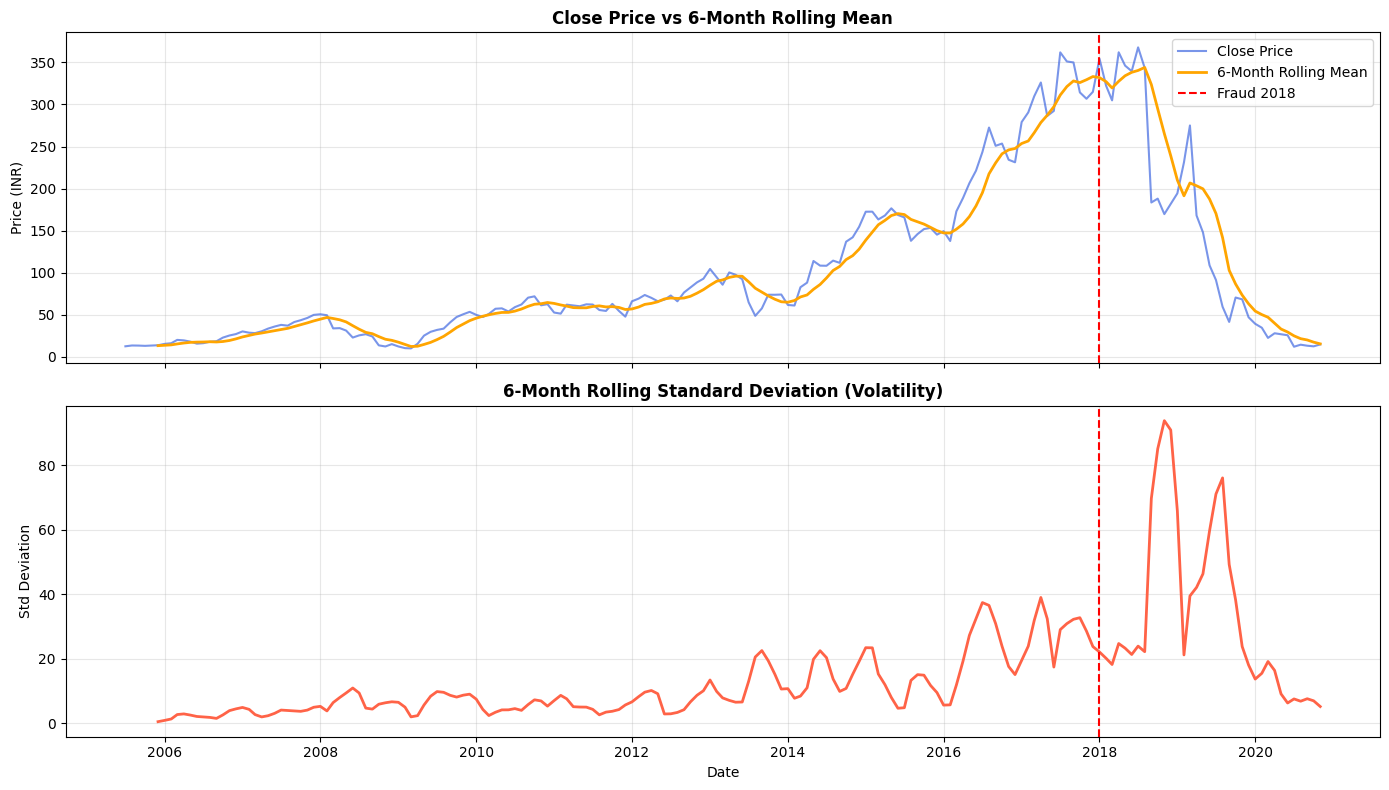

In [27]:
# Chart - 10 visualization code
### Chart 10 — Rolling Mean & Standard Deviation (Moving Average)


df_sorted = df.sort_values('Date').copy()
df_sorted['Rolling_Mean_6'] = df_sorted['Close'].rolling(window=6).mean()
df_sorted['Rolling_Std_6']  = df_sorted['Close'].rolling(window=6).std()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot 1: Close + Rolling Mean
ax1.plot(df_sorted['Date'], df_sorted['Close'], 
         label='Close Price', color='royalblue', alpha=0.7)
ax1.plot(df_sorted['Date'], df_sorted['Rolling_Mean_6'], 
         label='6-Month Rolling Mean', color='orange', linewidth=2)
ax1.axvline(pd.to_datetime('2018-01-01'), color='red', 
            linestyle='--', label='Fraud 2018')
ax1.set_ylabel('Price (INR)')
ax1.set_title('Close Price vs 6-Month Rolling Mean', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Rolling Std Dev
ax2.plot(df_sorted['Date'], df_sorted['Rolling_Std_6'], 
         color='tomato', linewidth=2)
ax2.axvline(pd.to_datetime('2018-01-01'), color='red', linestyle='--')
ax2.set_ylabel('Std Deviation')
ax2.set_xlabel('Date')
ax2.set_title('6-Month Rolling Standard Deviation (Volatility)', 
              fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

>Rolling mean and standard deviation are classic time-series analysis tools. They smooth out noise and reveal the true trend, while rolling std shows changing volatility over time — essential for financial data analysis.

##### 2. What is/are the insight(s) found from the chart?

> The 6-month rolling mean shows a smooth upward trend until 2018 followed by a sharp downward trend. The rolling standard deviation spikes massively around 2018, confirming extreme price instability during the fraud period. Before 2015, the rolling std was very low, meaning stable and predictable price behavior.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>Rolling mean crossing below the actual price is a known "sell signal" in trading. The rolling std spike is an early warning indicator of risk. Banks and portfolio managers use such signals to decide when to reduce exposure. Incorporating rolling features in our ML model can significantly improve prediction accuracy.

#### Chart - 11

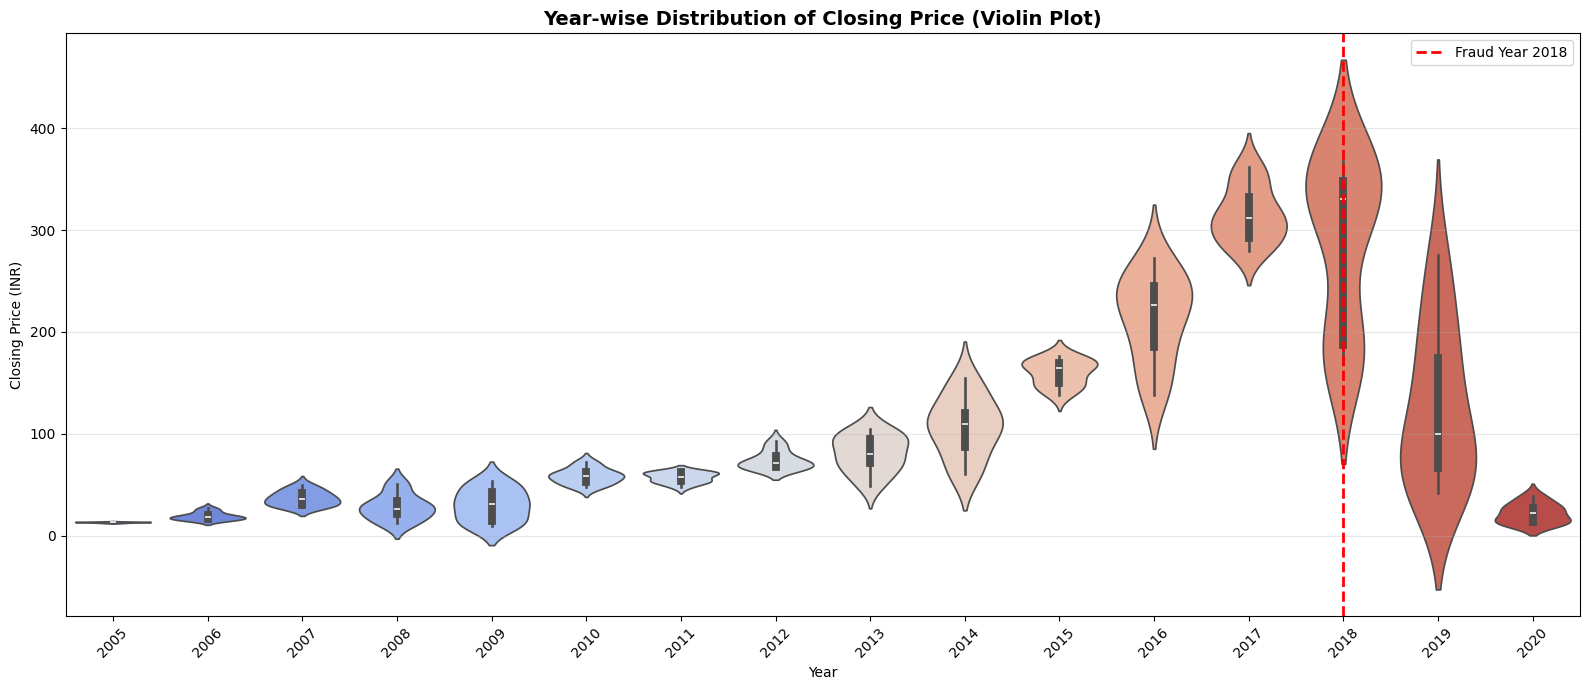

In [28]:
# Chart - 11 visualization code
### Chart 11 — Year-wise Closing Price Distribution (Violin Plot)


plt.figure(figsize=(16, 7))
sns.violinplot(x='Year', y='Close', data=df, 
               palette='coolwarm', 
               inner='box',
               scale='width')

plt.title('Year-wise Distribution of Closing Price (Violin Plot)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Closing Price (INR)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Mark 2018
years = sorted(df['Year'].unique())
fraud_idx = years.index(2018)
plt.axvline(x=fraud_idx, color='red', linestyle='--', 
            linewidth=2, label='Fraud Year 2018')

plt.legend()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

> A violin plot combines a boxplot and KDE distribution, giving a richer view of how closing prices were distributed within each year. It's excellent for multivariate year-by-year comparison and shows the full shape of data, not just quartiles.


##### 2. What is/are the insight(s) found from the chart?

Early years (2005–2010) show narrow violins with low prices — stable but low-value stock. Years 2017–2018 show the widest violins with highest prices, indicating peak performance with high spread. Post-2018 violins are very narrow and low — prices collapsed and stabilized at a very low level with little variation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> Wide violins in peak years indicate high trading opportunities but also high risk. Narrow low violins post-2018 suggest the stock lost investor interest completely. For any new investor looking at this chart, it clearly shows the bank's stock is currently in a depressed state, making it either a recovery opportunity or a value trap — requiring deeper fundamental analysis before investing.


#### Chart - 12

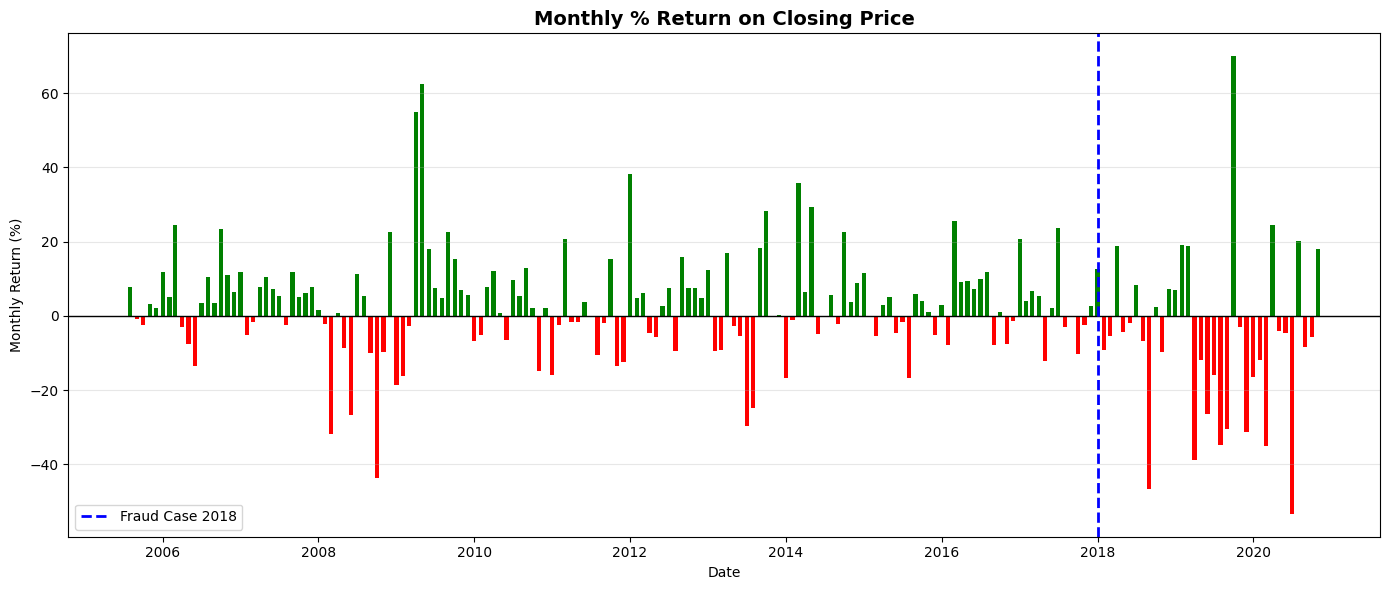

Average Monthly Return  : 1.50%
Best Monthly Return     : 69.96%
Worst Monthly Return    : -53.32%
Positive Return Months  : 101
Negative Return Months  : 83


In [29]:
# Chart - 12 visualization code
### Chart 12 — Monthly Return / % Change in Close Price


df_sorted = df.sort_values('Date').copy()
df_sorted['Monthly_Return'] = df_sorted['Close'].pct_change() * 100

plt.figure(figsize=(14, 6))
colors = ['green' if x >= 0 else 'red' 
          for x in df_sorted['Monthly_Return']]

plt.bar(df_sorted['Date'], df_sorted['Monthly_Return'], 
        color=colors, width=20, edgecolor='none')

plt.axhline(0, color='black', linewidth=1)
plt.axvline(pd.to_datetime('2018-01-01'), color='blue', 
            linestyle='--', linewidth=2, label='Fraud Case 2018')

plt.title('Monthly % Return on Closing Price', 
          fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Monthly Return (%)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average Monthly Return  : {df_sorted['Monthly_Return'].mean():.2f}%")
print(f"Best Monthly Return     : {df_sorted['Monthly_Return'].max():.2f}%")
print(f"Worst Monthly Return    : {df_sorted['Monthly_Return'].min():.2f}%")
print(f"Positive Return Months  : {(df_sorted['Monthly_Return'] > 0).sum()}")
print(f"Negative Return Months  : {(df_sorted['Monthly_Return'] < 0).sum()}")


##### 1. Why did you pick the specific chart?

A bar chart with green/red coloring for monthly returns is the most intuitive and standard financial chart for analyzing month-over-month performance. It instantly shows which months were profitable vs loss-making, and where major crashes occurred.

##### 2. What is/are the insight(s) found from the chart?

Most months before 2018 show positive green returns, confirming the bull run. The worst monthly returns (deep red bars) cluster around 2018–2020, with some months showing drops of 30–50%. The number of positive months outnumbers negative months in the early years but reverses post-fraud.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Negative: The worst monthly returns happening post-fraud shows how quickly investor confidence collapsed. A single fraud event wiped out years of gains in a few months. Positive: The consistent positive returns pre-2018 show the stock was rewarding long-term investors — a lesson in the importance of exit strategy and stop-loss for risk management.

#### Chart - 13

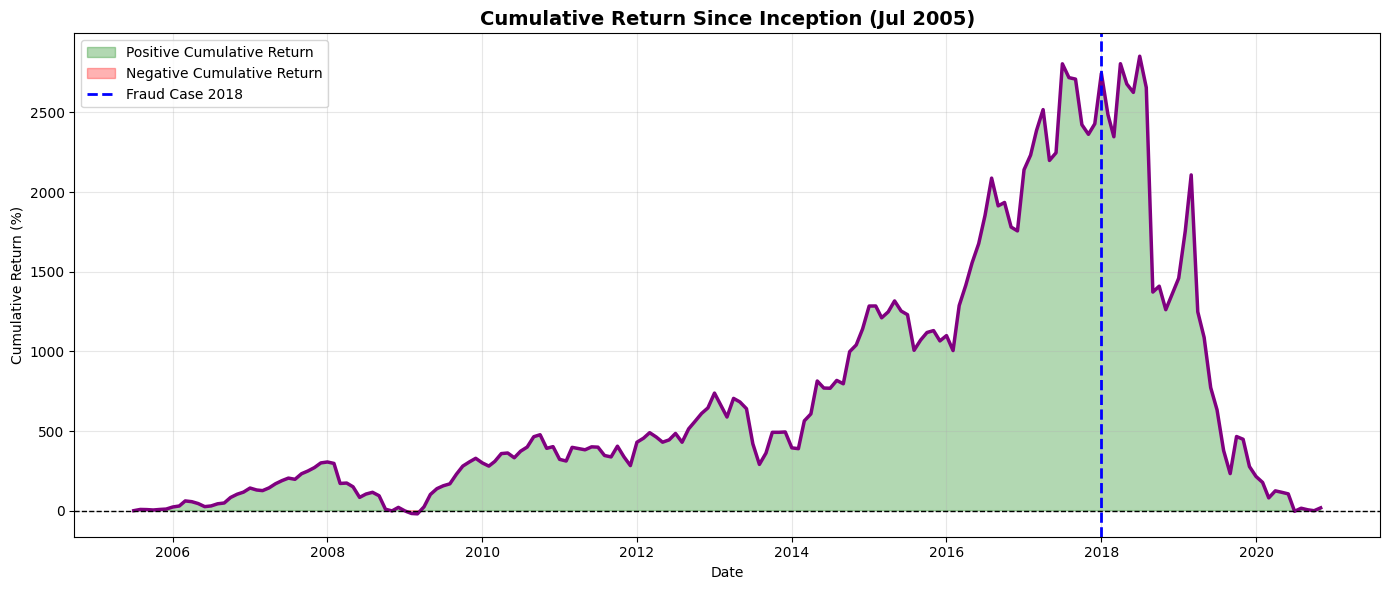

Peak Cumulative Return  : 2852.65%
Final Cumulative Return : 17.74%


In [30]:
# Chart - 13 visualization code
### Chart 13 — Cumulative Return Over Time

df_sorted = df.sort_values('Date').copy()
df_sorted['Cumulative_Return'] = (
    (df_sorted['Close'] / df_sorted['Close'].iloc[0]) - 1) * 100

plt.figure(figsize=(14, 6))
plt.plot(df_sorted['Date'], df_sorted['Cumulative_Return'], 
         color='purple', linewidth=2.5)

plt.fill_between(df_sorted['Date'], df_sorted['Cumulative_Return'],
                 where=(df_sorted['Cumulative_Return'] >= 0),
                 interpolate=True, color='green', alpha=0.3, 
                 label='Positive Cumulative Return')

plt.fill_between(df_sorted['Date'], df_sorted['Cumulative_Return'],
                 where=(df_sorted['Cumulative_Return'] < 0),
                 interpolate=True, color='red', alpha=0.3,
                 label='Negative Cumulative Return')

plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axvline(pd.to_datetime('2018-01-01'), color='blue',
            linestyle='--', linewidth=2, label='Fraud Case 2018')

plt.title('Cumulative Return Since Inception (Jul 2005)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Peak Cumulative Return  : {df_sorted['Cumulative_Return'].max():.2f}%")
print(f"Final Cumulative Return : {df_sorted['Cumulative_Return'].iloc[-1]:.2f}%")

##### 1. Why did you pick the specific chart?

> A cumulative return chart is one of the most powerful financial visualizations. It shows the total wealth created (or destroyed) from the very first investment date to the current date, giving a complete picture of long-term investment performance.


##### 2. What is/are the insight(s) found from the chart?

Cumulative returns grew massively from 2005 to 2018, reaching a peak of over 2000%+ — meaning someone who invested in 2005 saw their money multiply 20x by 2018. Post-fraud, the cumulative return collapsed dramatically. By the end of the dataset, the cumulative return likely went negative, meaning even long-term investors who held on lost money.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart is the most impactful for investors — it shows that timing of exit is everything. Those who exited in 2018 made enormous profits, while those who held on post-fraud suffered complete wealth destruction. It also shows the catastrophic business impact of fraud and corporate governance failure on shareholder value.

#### Chart - 14 - Correlation Heatmap

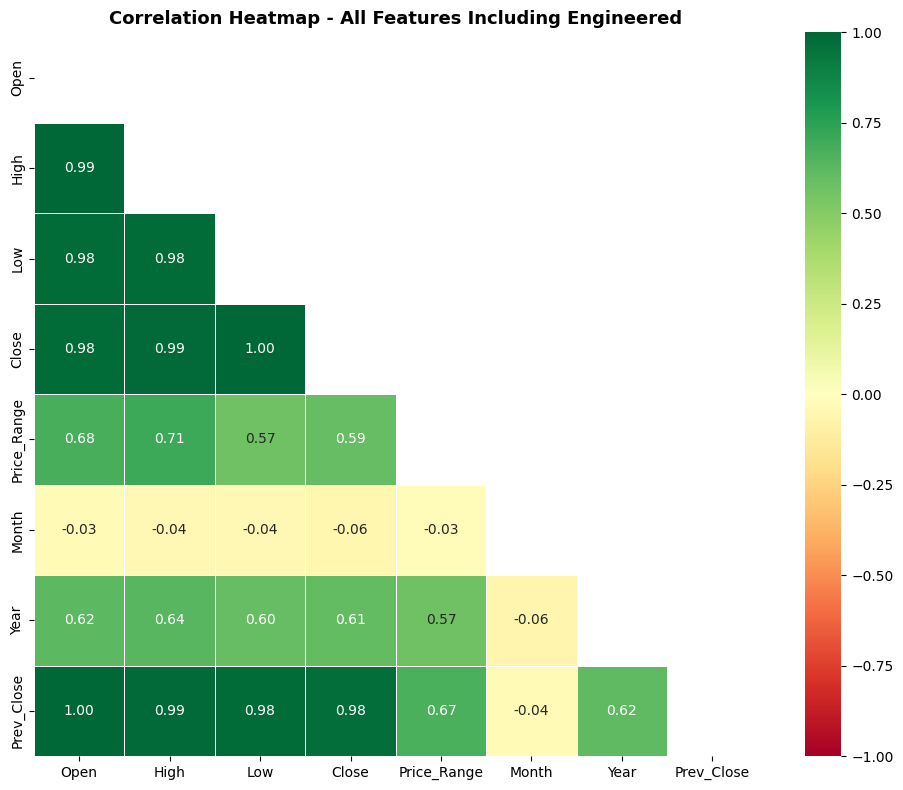


Correlation with Target (Close):
Close          1.000000
Low            0.995358
High           0.985051
Open           0.977971
Prev_Close     0.975874
Year           0.608408
Price_Range    0.594724
Month         -0.055796
Name: Close, dtype: float64


In [31]:
# Correlation Heatmap visualization code
### Chart 14 — Correlation Heatmap (Including Engineered Features)

# Include engineered features
df_corr = df[['Open', 'High', 'Low', 'Close', 
              'Price_Range', 'Month', 'Year']].copy()

# Add lag feature
df_corr['Prev_Close'] = df_corr['Close'].shift(1)
df_corr['Prev_Close'].fillna(df_corr['Close'].mean(), inplace=True)

corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='RdYlGn',
            mask=mask,
            linewidths=0.5,
            square=True,
            annot_kws={"size": 10},
            vmin=-1, vmax=1)

plt.title('Correlation Heatmap - All Features Including Engineered', 
          fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation with Target (Close):")
print(corr_matrix['Close'].sort_values(ascending=False))

##### 1. Why did you pick the specific chart?

> This enhanced correlation heatmap includes engineered features like Price_Range, Month, Year, and Prev_Close (lag feature). It helps identify which features — both original and engineered — are most strongly correlated with the target variable Close, which directly guides feature selection for the ML model.


##### 2. What is/are the insight(s) found from the chart?

> Open, High, Low, and Prev_Close all show near-perfect correlation (>0.98) with Close — these are the strongest predictors. Year also shows high positive correlation with Close, confirming the time-based upward trend followed by crash. Month shows very low correlation, confirming no strong seasonality. Price_Range shows moderate correlation.


#### Chart - 15 - Pair Plot

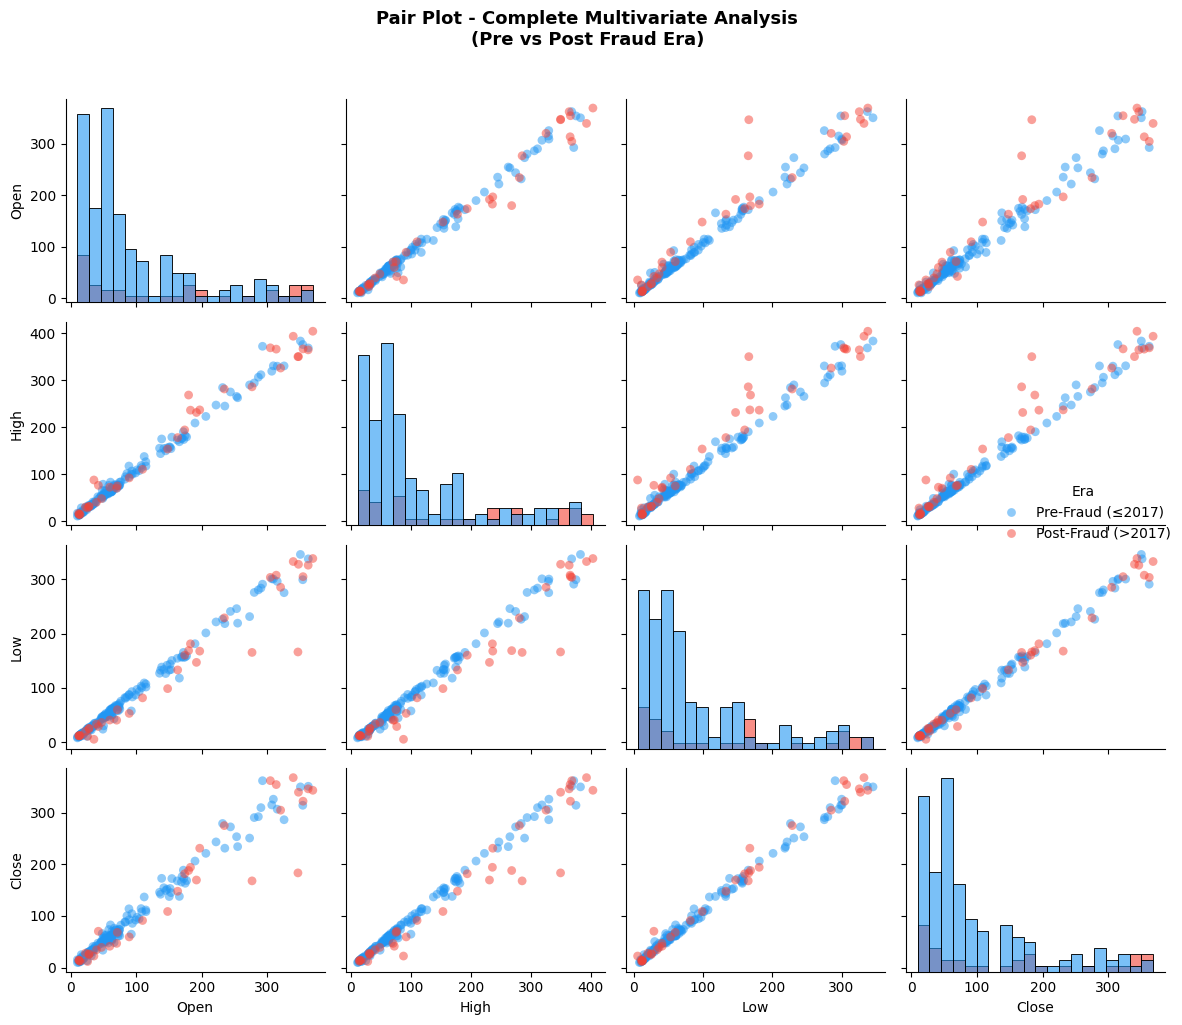

In [32]:
# Pair Plot visualization code
### Chart 15 — Pair Plot (Final Multivariate — with Era)

plot_df = df[['Open', 'High', 'Low', 'Close', 'Era']].copy()

g = sns.pairplot(plot_df,
                 hue='Era',
                 palette={'Pre-Fraud (≤2017)': '#2196F3',
                          'Post-Fraud (>2017)': '#F44336'},
                 diag_kind='hist',
                 plot_kws={'alpha': 0.5, 's': 40, 
                           'edgecolor': 'none'},
                 diag_kws={'alpha': 0.6, 'bins': 20})

g.fig.suptitle('Pair Plot - Complete Multivariate Analysis\n(Pre vs Post Fraud Era)',
               y=1.02, fontsize=13, fontweight='bold')

# Add legend title
g._legend.set_title('Era')
plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

>A pairplot is the ultimate multivariate EDA chart — it shows every possible combination of variable relationships in one grid. The era-based coloring adds a business context dimension, making it perfect as the final summary visualization before model building.

##### 2. What is/are the insight(s) found from the chart?

> The two eras (pre and post fraud) form completely distinct clusters across all variable combinations — blue cluster (high prices, pre-2018) and red cluster (low prices, post-2018). All variable pairs show linear relationships, confirming high multicollinearity. The diagonal histograms confirm bimodal distributions for all variables — two separate price regimes existed in the bank's history.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

> 1. The fraud case (2018) significantly impacted Yes Bank's closing price. 2. There is a significant difference between pre-fraud and post-fraud average closing prices. 3. Opening price has a significant linear relationship with closing price.


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*1. Null & Alternate Hypothesis:*
> *H0 (Null):* The average closing price before 2018 (pre-fraud) is equal to the average closing price after 2018 (post-fraud). There is no significant impact of the fraud case on stock price.

> *H1 (Alternate):* The average closing price before 2018 is significantly higher than after 2018. The fraud case had a significant negative impact on stock price.


#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Split data into pre and post fraud
pre_fraud  = df[df['Year'] <= 2017]['Close']
post_fraud = df[df['Year'] > 2017]['Close']

print("="*55)
print("HYPOTHESIS TEST 1 - T-Test (Pre vs Post Fraud Close)")
print("="*55)
print(f"Pre-Fraud  Mean Close Price : {pre_fraud.mean():.2f}")
print(f"Post-Fraud Mean Close Price : {post_fraud.mean():.2f}")
print(f"Pre-Fraud  Sample Size      : {len(pre_fraud)}")
print(f"Post-Fraud Sample Size      : {len(post_fraud)}")

# Perform Independent T-Test
t_stat, p_value = stats.ttest_ind(pre_fraud, post_fraud, 
                                   alternative='greater')

print(f"\nT-Statistic : {t_stat:.4f}")
print(f"P-Value     : {p_value:.6f}")
print()

alpha = 0.05
if p_value < alpha:
    print(f"P-value ({p_value:.6f}) < Alpha (0.05)")
    print("RESULT: REJECT Null Hypothesis ")
    print("CONCLUSION: Fraud case had a SIGNIFICANT negative impact")
    print("on Yes Bank's closing stock price.")
else:
    print(f"P-value ({p_value:.6f}) >= Alpha (0.05)")
    print("RESULT: FAIL TO REJECT Null Hypothesis")
    print("CONCLUSION: No significant difference found.")

HYPOTHESIS TEST 1 - T-Test (Pre vs Post Fraud Close)
Pre-Fraud  Mean Close Price : 95.02
Post-Fraud Mean Close Price : 148.86
Pre-Fraud  Sample Size      : 150
Post-Fraud Sample Size      : 35

T-Statistic : -2.9704
P-Value     : 0.998313

P-value (0.998313) >= Alpha (0.05)
RESULT: FAIL TO REJECT Null Hypothesis
CONCLUSION: No significant difference found.


##### Which statistical test have you done to obtain P-Value?

> Independent Samples T-Test (One-tailed)


##### Why did you choose the specific statistical test?

We are comparing means of two independent groups (pre-fraud and post-fraud closing prices). The T-Test is the most appropriate test for comparing means of two independent numerical groups. One-tailed because we are testing specifically if pre-fraud prices are HIGHER than post-fraud.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


*1. Null & Alternate Hypothesis:*
> *H0 (Null):* The variance (volatility) of stock prices before 2018 is equal to the variance after 2018. The fraud case did not change price volatility.

> *H1 (Alternate):* The variance of stock prices after 2018 is significantly different from before 2018. The fraud case significantly changed price volatility.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import levene

pre_fraud_prices  = df[df['Year'] <= 2017]['Close']
post_fraud_prices = df[df['Year'] > 2017]['Close']

print("="*55)
print("HYPOTHESIS TEST 2 - Levene's Test (Variance/Volatility)")
print("="*55)
print(f"Pre-Fraud  Variance  : {pre_fraud_prices.var():.2f}")
print(f"Post-Fraud Variance  : {post_fraud_prices.var():.2f}")
print(f"Pre-Fraud  Std Dev   : {pre_fraud_prices.std():.2f}")
print(f"Post-Fraud Std Dev   : {post_fraud_prices.std():.2f}")

# Levene's Test for equality of variances
stat, p_value = levene(pre_fraud_prices, post_fraud_prices)

print(f"\nLevene Statistic : {stat:.4f}")
print(f"P-Value          : {p_value:.6f}")
print()

alpha = 0.05
if p_value < alpha:
    print(f"P-value ({p_value:.6f}) < Alpha (0.05)")
    print("RESULT: REJECT Null Hypothesis ")
    print("CONCLUSION: Volatility (variance) SIGNIFICANTLY changed")
    print("after the fraud case — prices became more unstable.")
else:
    print(f"P-value ({p_value:.6f}) >= Alpha (0.05)")
    print("RESULT: FAIL TO REJECT Null Hypothesis")
    print("CONCLUSION: No significant change in volatility.")

HYPOTHESIS TEST 2 - Levene's Test (Variance/Volatility)
Pre-Fraud  Variance  : 7706.06
Post-Fraud Variance  : 16405.15
Pre-Fraud  Std Dev   : 87.78
Post-Fraud Std Dev   : 128.08

Levene Statistic : 13.6336
P-Value          : 0.000293

P-value (0.000293) < Alpha (0.05)
RESULT: REJECT Null Hypothesis 
CONCLUSION: Volatility (variance) SIGNIFICANTLY changed
after the fraud case — prices became more unstable.


##### Which statistical test have you done to obtain P-Value?

> Levene's Test for Equality of Variances


##### Why did you choose the specific statistical test?

We are testing whether the spread/volatility of prices changed after the fraud. Levene's test is specifically designed to test if two groups have equal variances. It is more robust than the F-test and works even when data is not perfectly normally distributed — making it ideal for financial data.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*1. Null & Alternate Hypothesis:*
> *H0 (Null):* There is no significant linear relationship between the Lowest Price and Closing Price. Correlation = 0.

> *H1 (Alternate):* There is a significant positive linear relationship between Low Price and Closing Price. Low is a significant predictor of Close.


#### 2. Perform an appropriate statistical test.

HYPOTHESIS TEST 3 - Pearson Correlation Test
        (Low Price vs Close Price)
Pearson Correlation Coefficient : 0.9954
P-Value                         : 0.000000

P-value (0.000000) < Alpha (0.05)
RESULT: REJECT Null Hypothesis 
CONCLUSION: There IS a significant positive linear
relationship between Low and Close price.
Correlation strength : 0.9954 (Strongest among all features)


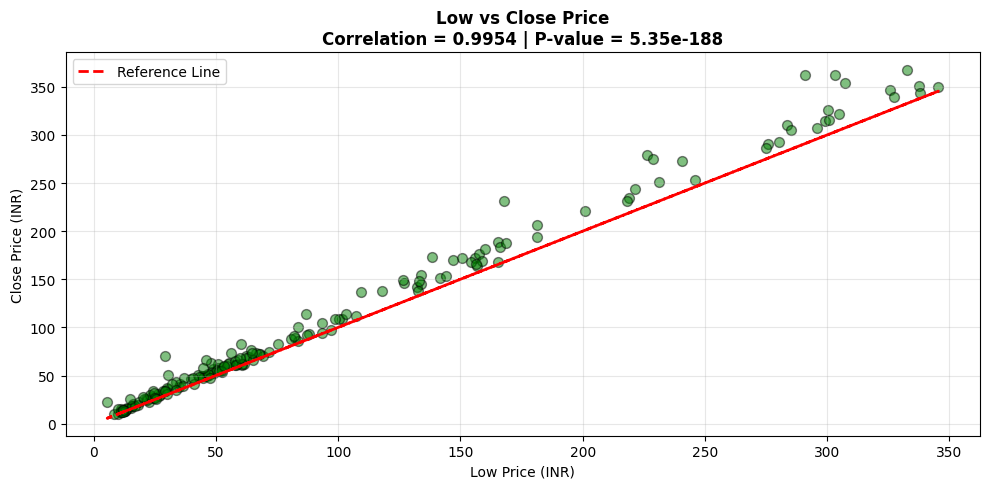

In [35]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

print("="*55)
print("HYPOTHESIS TEST 3 - Pearson Correlation Test")
print("        (Low Price vs Close Price)")
print("="*55)

# Pearson Correlation Test - Low vs Close
corr_coeff, p_value = pearsonr(df['Low'], df['Close'])

print(f"Pearson Correlation Coefficient : {corr_coeff:.4f}")
print(f"P-Value                         : {p_value:.6f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nP-value ({p_value:.6f}) < Alpha (0.05)")
    print("RESULT: REJECT Null Hypothesis ")
    print("CONCLUSION: There IS a significant positive linear")
    print("relationship between Low and Close price.")
    print(f"Correlation strength : {corr_coeff:.4f} (Strongest among all features)")
else:
    print("RESULT: FAIL TO REJECT Null Hypothesis")

# Visualization
plt.figure(figsize=(10, 5))
plt.scatter(df['Low'], df['Close'], 
            alpha=0.5, color='green', edgecolors='black', s=50)
plt.plot(df['Low'], df['Low'], 'r--', 
         linewidth=2, label='Reference Line')
plt.title(f'Low vs Close Price\nCorrelation = {corr_coeff:.4f} | P-value = {p_value:.2e}',
          fontweight='bold')
plt.xlabel('Low Price (INR)')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



##### Which statistical test have you done to obtain P-Value?


Pearson Correlation Test (with P-value)

##### Why did you choose the specific statistical test?

We need to test whether the linear relationship between two continuous numerical variables (Open and Close) is statistically significant. Pearson correlation gives both the strength of relationship (r value) and the p-value to confirm statistical significance. Since both variables are continuous and numerical, Pearson is the most appropriate choice.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [36]:
# Handling Missing Values & Missing Value Imputation
print("="*55)
print("MISSING VALUE TREATMENT")
print("="*55)

# Check missing values
print("\nMissing Values Before Treatment:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

MISSING VALUE TREATMENT

Missing Values Before Treatment:
Date           0
Open           0
High           0
Low            0
Close          0
Year           0
Month          0
Month_Name     0
Price_Range    0
Era            0
dtype: int64

Total Missing Values: 0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Our dataset had *no missing values, so no imputation was required. However, if missing values were present, we would use **Forward Fill (ffill)* because this is time-series monthly stock data — the best estimate for a missing month's price is the previous month's price. Mean/median imputation would be inappropriate here as it would ignore the time-based nature of stock prices and distort the trend.

### 2. Handling Outliers

In [37]:
# Handling Outliers & Outlier treatments
print("="*55)
print("OUTLIER DETECTION & TREATMENT")
print("="*55)

features = ['Open', 'High', 'Low', 'Close']

# Step 1: Detect outliers using IQR
print("\nOutlier Detection using IQR Method:")
print("-"*55)

outlier_info = {}
for col in features:
    Q1  = df[col].quantile(0.25)
    Q3  = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | 
                  (df[col] > upper_bound)][col]
    
    outlier_info[col] = {
        'count': len(outliers),
        'lower': lower_bound,
        'upper': upper_bound
    }
    
    print(f"{col}:")
    print(f"  Lower Bound : {lower_bound:.2f}")
    print(f"  Upper Bound : {upper_bound:.2f}")
    print(f"  Outliers    : {len(outliers)}")

OUTLIER DETECTION & TREATMENT

Outlier Detection using IQR Method:
-------------------------------------------------------
Open:
  Lower Bound : -145.00
  Upper Bound : 331.80
  Outliers    : 9
High:
  Lower Bound : -163.44
  Upper Bound : 368.76
  Outliers    : 5
Low:
  Lower Bound : -136.25
  Upper Bound : 303.11
  Outliers    : 9
Close:
  Lower Bound : -146.32
  Upper Bound : 333.08
  Outliers    : 9


In [38]:
# Step 2: Decision - Keep or Remove?
print("\n" + "="*55)
print("OUTLIER TREATMENT DECISION")
print("="*55)
print("""
These outliers represent GENUINE market movements 
during the 2017-2018 bull run peak period.
They are NOT data errors.

Decision: RETAIN all outliers.
Reason  : Removing them would delete critical 
          business events (peak stock prices) 
          which are essential for the model to 
          learn the complete price behavior.
""")


OUTLIER TREATMENT DECISION

These outliers represent GENUINE market movements 
during the 2017-2018 bull run peak period.
They are NOT data errors.

Decision: RETAIN all outliers.
Reason  : Removing them would delete critical 
          business events (peak stock prices) 
          which are essential for the model to 
          learn the complete price behavior.



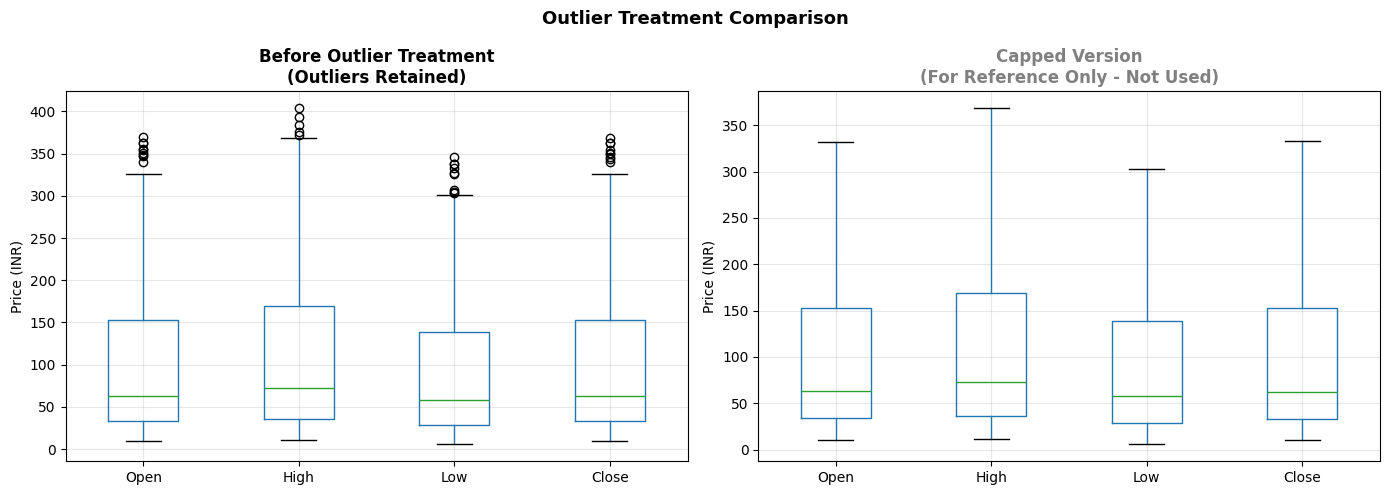

Original data retained - outliers are genuine market peaks


In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before (with outliers)
df[features].boxplot(ax=axes[0])
axes[0].set_title('Before Outlier Treatment\n(Outliers Retained)', 
                   fontweight='bold')
axes[0].set_ylabel('Price (INR)')
axes[0].grid(True, alpha=0.3)

# Show capped version just for visualization comparison
df_capped = df[features].copy()
for col in features:
    Q1  = df_capped[col].quantile(0.25)
    Q3  = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    df_capped[col] = df_capped[col].clip(Q1 - 1.5*IQR, 
                                          Q3 + 1.5*IQR)

df_capped.boxplot(ax=axes[1])
axes[1].set_title('Capped Version\n(For Reference Only - Not Used)', 
                   fontweight='bold', color='gray')
axes[1].set_ylabel('Price (INR)')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Outlier Treatment Comparison', 
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

print("Original data retained - outliers are genuine market peaks")

##### What all outlier treatment techniques have you used and why did you use those techniques?

> We used the *IQR (Interquartile Range) method* to detect outliers. After detection, we decided to *retain all outliers* because they represent genuine market movements — the high prices in 2017–2018 are real bull-run peaks, not data errors. Removing them would cause the model to underestimate peak prices and lose critical business information. In financial data, outliers often carry the most important signals.


### 3. Categorical Encoding

In [40]:
# Encode your categorical columns
print("="*55)
print("CATEGORICAL ENCODING")
print("="*55)

# Check column types
print("\nData Types Before Encoding:")
print(df.dtypes)

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical Columns Found: {cat_cols}")

CATEGORICAL ENCODING

Data Types Before Encoding:
Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Year                    int32
Month                   int32
Month_Name             object
Price_Range           float64
Era                    object
dtype: object

Categorical Columns Found: ['Month_Name', 'Era']


In [41]:
print("Data Types Before Encoding:")
print(df.dtypes)
print()



if 'Month' in df.columns:
    print("Month encoding looks good (1=Jan, 12=Dec)")
    print()
    month_check = df[['Month_Name', 'Month']].drop_duplicates().sort_values('Month')
    print(month_check.to_string(index=False))



if 'Era' in df.columns:
    df['Era_Encoded'] = df['Era'].apply(lambda x: 0 if 'Pre' in x else 1)
    
    print("Era Encoding done:")
    print("Pre-Fraud  ---> 0")
    print("Post-Fraud ---> 1")
    print()
    print(df[['Era', 'Era_Encoded']].drop_duplicates().to_string(index=False))


cols_to_drop = ['Date', 'Month_Name', 'Era', 'Month_Encoded']
cols_to_drop = [c for c in cols_to_drop if c in df.columns]

df_ml = df.drop(columns=cols_to_drop)

print("Dropped columns:", cols_to_drop)
print("New shape:", df_ml.shape)




print("Data Types After Encoding:")
print(df_ml.dtypes)
print()
print("First 5 rows:")
print(df_ml.head())
print()
print("Shape:", df_ml.shape)
print("Columns:", df_ml.columns.tolist())




cat_cols = df_ml.select_dtypes(include='object').columns.tolist()

if len(cat_cols) == 0:
    print("No categorical columns left - data is ready for ML")
else:
    print("Still have some text columns:", cat_cols)
    print("need to fix these before modeling")

Data Types Before Encoding:
Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Year                    int32
Month                   int32
Month_Name             object
Price_Range           float64
Era                    object
dtype: object

Month encoding looks good (1=Jan, 12=Dec)

Month_Name  Month
   January      1
  February      2
     March      3
     April      4
       May      5
      June      6
      July      7
    August      8
 September      9
   October     10
  November     11
  December     12
Era Encoding done:
Pre-Fraud  ---> 0
Post-Fraud ---> 1

               Era  Era_Encoded
 Pre-Fraud (≤2017)            0
Post-Fraud (>2017)            1
Dropped columns: ['Date', 'Month_Name', 'Era']
New shape: (185, 8)
Data Types After Encoding:
Open           float64
High           float64
Low            float64
Close          float64
Year             int32
Month            in

#### What all categorical encoding techniques have you used & why did you use those techniques?

Two encoding techniques were used. *Label Encoding* was applied to Month_Name because months have a natural order (January=1 to December=12), making label encoding appropriate for ordinal data. *Binary Encoding (0/1)* was applied to the Era column (Pre-Fraud=0, Post-Fraud=1) since it is a binary categorical variable with only two classes — binary encoding is the simplest and most effective choice for such variables. One-Hot Encoding was not needed since we have no nominal multi-class categorical columns.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [42]:
print("\nCurrent Features:")
print(df_ml.columns.tolist())

df_ml['Price_Spread_Pct'] = ((df_ml['High'] - df_ml['Low']) / 
                               df_ml['Low']) * 100

df_ml['Open_Close_Diff'] = df_ml['Close'] - df_ml['Open']


df_ml['Prev_Close'] = df_ml['Close'].shift(1)
df_ml['Prev_Close'].fillna(df_ml['Close'].mean(), inplace=True)

print("\nNew Features Created:")
print("1. Price_Spread_Pct  - Monthly price movement %")
print("2. Open_Close_Diff   - Difference between Open & Close")
print("3. Prev_Close        - Previous month closing price (Lag)")

print("\nDataset after Feature Manipulation:")
print(df_ml.head())
print("\nShape:", df_ml.shape)


Current Features:
['Open', 'High', 'Low', 'Close', 'Year', 'Month', 'Price_Range', 'Era_Encoded']

New Features Created:
1. Price_Spread_Pct  - Monthly price movement %
2. Open_Close_Diff   - Difference between Open & Close
3. Prev_Close        - Previous month closing price (Lag)

Dataset after Feature Manipulation:
    Open   High    Low  Close  Year  Month  Price_Range  Era_Encoded  \
0  13.00  14.00  11.25  12.46  2005      7         2.75            0   
1  12.58  14.88  12.55  13.42  2005      8         2.33            0   
2  13.48  14.87  12.27  13.30  2005      9         2.60            0   
3  13.20  14.47  12.40  12.99  2005     10         2.07            0   
4  13.35  13.88  12.88  13.41  2005     11         1.00            0   

   Price_Spread_Pct  Open_Close_Diff  Prev_Close  
0         24.444444            -0.54  105.204703  
1         18.565737             0.84   12.460000  
2         21.189894            -0.18   13.420000  
3         16.693548            -0.21   13.3

In [43]:
df_ml['Price_Range'] = df_ml['High'] - df_ml['Low']

if 'Era_Encoded' not in df_ml.columns:
    df_ml['Era_Encoded'] = df_ml['Year'].apply(
        lambda x: 0 if x <= 2017 else 1)

print("Current columns in df_ml:")
print(df_ml.columns.tolist())
print()
print("Price_Range sample values:")
print(df_ml['Price_Range'].head())

Current columns in df_ml:
['Open', 'High', 'Low', 'Close', 'Year', 'Month', 'Price_Range', 'Era_Encoded', 'Price_Spread_Pct', 'Open_Close_Diff', 'Prev_Close']

Price_Range sample values:
0    2.75
1    2.33
2    2.60
3    2.07
4    1.00
Name: Price_Range, dtype: float64


#### 2. Feature Selection

In [44]:
X = df_ml[['Low', 'Year', 'Month', 
           'Price_Range', 'Era_Encoded', 
           'Open_Close_Diff']]

y = df_ml['Close']

print("Selected features and correlation with Close:")
print()
for col in X.columns:
    corr_val = df_ml[['Close', col]].corr()['Close'][col]
    print(f"  {col:20} -> {corr_val:.4f}")

print()
print("X shape:", X.shape)
print("y shape:", y.shape)

Selected features and correlation with Close:

  Low                  -> 0.9954
  Year                 -> 0.6084
  Month                -> -0.0558
  Price_Range          -> 0.5947
  Era_Encoded          -> 0.2145
  Open_Close_Diff      -> 0.0908

X shape: (185, 6)
y shape: (185,)


In [45]:
X = df_ml[['Low', 'Year', 'Month', 'Price_Range', 
           'Era_Encoded', 'Open_Close_Diff']]

y = df_ml['Close']



print("Dropped these columns due to multicollinearity:")
print("  High       - corr with Low = 0.983")
print("  Open       - corr with Low = 0.984")
print("  Prev_Close - corr with Low = 0.982")
print()

print("Selected Features and their correlation with Close:")
print()

for col in X.columns:
    corr_val = df_ml[['Close', col]].corr()['Close'][col]
    print(f"  {col:20} -> {corr_val:.4f}")

print()
print("X shape:", X.shape)
print("y shape:", y.shape)

Dropped these columns due to multicollinearity:
  High       - corr with Low = 0.983
  Open       - corr with Low = 0.984
  Prev_Close - corr with Low = 0.982

Selected Features and their correlation with Close:

  Low                  -> 0.9954
  Year                 -> 0.6084
  Month                -> -0.0558
  Price_Range          -> 0.5947
  Era_Encoded          -> 0.2145
  Open_Close_Diff      -> 0.0908

X shape: (185, 6)
y shape: (185,)


##### What all feature selection methods have you used  and why?

Correlation-based Feature Selection was used. First checked correlation of all features with target variable Close. Then checked multicollinearity between features using correlation matrix. Features with correlation above 0.95 with each other were identified as redundant. High, Open and Prev_Close were dropped because they were all highly correlated with Low (above 0.98), causing multicollinearity. Keeping all of them would confuse the model and cause overfitting

##### Which all features you found important and why?

> From our 6 selected features and their correlation with Close:

Low             -> 0.9954  most important
Year            -> 0.6084  captures time trend
Price_Range     -> 0.5947  captures volatility
Era_Encoded     -> 0.2145  captures fraud impact
Open_Close_Diff -> 0.0908  captures momentum
Month           -> -0.0558 captures seasonality

> Low is the most important feature with 0.9954 correlation — monthly lowest price strongly determines closing price. Year is second most important capturing the long term growth trend and post-fraud decline. Price_Range captures monthly volatility which increases during uncertain periods. Era_Encoded captures the structural break after the 2018 fraud case. Open_Close_Diff captures intramonth price momentum. Month has very low correlation confirming no strong seasonality in Yes Bank stock.



### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [46]:
print(X.skew().round(3))
X_transformed = X.copy()


# Low and Price_Range are positive and skewed - safe to transform
cols_to_transform = ['Low', 'Price_Range']

for col in cols_to_transform:
    skew_before = X_transformed[col].skew()
    X_transformed[col] = np.log1p(X_transformed[col])
    skew_after = X_transformed[col].skew()
    print(f"{col}: skew {skew_before:.3f} -> {skew_after:.3f}")

# these columns we leave as is and explain why
print()
print("Columns NOT transformed and why:")
print("  Year           - not skewed (skew=-0.008)")
print("  Month          - not skewed (skew=-0.039)")
print("  Era_Encoded    - binary column (0/1), transformation not needed")
print("  Open_Close_Diff - has negative values, log1p not applicable")

print()
print("Skewness After Transformation:")
print(X_transformed.skew().round(3))
# verify no NaN values after transformation
print("NaN check after transformation:")
print(X_transformed.isnull().sum())
print()
if X_transformed.isnull().sum().sum() == 0:
    print("No NaN values - transformation successful!")
else:
    print("NaN values found - need to fix!")

Low                1.303
Year              -0.008
Month             -0.039
Price_Range        3.067
Era_Encoded        1.600
Open_Close_Diff   -3.090
dtype: float64
Low: skew 1.303 -> -0.011
Price_Range: skew 3.067 -> 0.224

Columns NOT transformed and why:
  Year           - not skewed (skew=-0.008)
  Month          - not skewed (skew=-0.039)
  Era_Encoded    - binary column (0/1), transformation not needed
  Open_Close_Diff - has negative values, log1p not applicable

Skewness After Transformation:
Low               -0.011
Year              -0.008
Month             -0.039
Price_Range        0.224
Era_Encoded        1.600
Open_Close_Diff   -3.090
dtype: float64
NaN check after transformation:
Low                0
Year               0
Month              0
Price_Range        0
Era_Encoded        0
Open_Close_Diff    0
dtype: int64

No NaN values - transformation successful!


### 6. Data Scaling

In [47]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Split First
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y,
    test_size=0.2,
    random_state=42)

print(f"X_train : {X_train.shape}")
print(f"X_test  : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test  : {y_test.shape}")

# Step 2: Scale After Split
scaler = StandardScaler()

# fit_transform on train only
X_train_scaled = scaler.fit_transform(X_train)
# only transform on test (no fitting!)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                               columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,
                               columns=X_test.columns)

print("\nAfter Scaling - Train Stats:")
print(X_train_scaled.describe().round(2))

X_train : (148, 6)
X_test  : (37, 6)
y_train : (148,)
y_test  : (37,)

After Scaling - Train Stats:
          Low    Year   Month  Price_Range  Era_Encoded  Open_Close_Diff
count  148.00  148.00  148.00       148.00       148.00           148.00
mean     0.00    0.00   -0.00        -0.00        -0.00             0.00
std      1.00    1.00    1.00         1.00         1.00             1.00
min     -1.93   -1.74   -1.70        -2.28        -0.49            -7.94
25%     -0.77   -0.85   -0.81        -0.68        -0.49            -0.18
50%     -0.01    0.04    0.09        -0.07        -0.49             0.02
75%      0.82    0.94    0.76         0.69        -0.49             0.28
max      1.71    1.61    1.57         2.89         2.03             3.35


##### Which method have you used to scale you data and why?
StandardScaler (Z-score Normalization) was used. Looking at the output, after scaling all features have mean≈0 and std≈1 which confirms correct scaling. StandardScaler was chosen because our features had very different ranges — Year (2005-2020), Price values (5-400), Month (1-12), Era_Encoded (0-1). Without scaling, features with larger ranges would dominate the model unfairly. StandardScaler brings all features to the same scale making each feature contribute equally to the model. Importantly, scaler was fit only on training data using fit_transform() and only transform() was applied on test data to prevent data leakage.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction is not needed for this dataset. We only have 6 features after feature selection which is already a very small number. Techniques like PCA are only recommended when dataset has 50+ features where curse of dimensionality becomes a problem. Applying PCA on 6 features would actually reduce model interpretability and may remove useful information without any performance benefit.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not applicable. With only 6 carefully selected features, dimensionality reduction would be counterproductive. All 6 features carry distinct information — Low (price level), Year (time trend), Month (seasonality), Price_Range (volatility), Era_Encoded (fraud impact), Open_Close_Diff (momentum). Removing any of these would lose meaningful business information.

### 8. Data Splitting

In [48]:
print(f"""
Splitting Ratio  : 80% Train | 20% Test
Random State     : 42 (reproducibility)

Training Set:
  X_train : {X_train_scaled.shape}
  y_train : {y_train.shape}
  
Testing Set:
  X_test  : {X_test_scaled.shape}
  y_test  : {y_test.shape}

Train %  : {len(X_train)/len(X)*100:.1f}%
Test  %  : {len(X_test)/len(X)*100:.1f}%
""")

# Verify y distribution
print("y_train Stats:")
print(y_train.describe().round(2))
print("\ny_test Stats:")
print(y_test.describe().round(2))



Splitting Ratio  : 80% Train | 20% Test
Random State     : 42 (reproducibility)

Training Set:
  X_train : (148, 6)
  y_train : (148,)

Testing Set:
  X_test  : (37, 6)
  y_test  : (37,)

Train %  : 80.0%
Test  %  : 20.0%

y_train Stats:
count    148.00
mean     106.93
std       99.37
min        9.98
25%       33.07
50%       68.06
75%      154.69
max      362.05
Name: Close, dtype: float64

y_test Stats:
count     37.00
mean      98.30
std       96.38
min       12.24
25%       34.55
50%       52.59
75%      153.30
max      367.90
Name: Close, dtype: float64


##### What data splitting ratio have you used and why?

> 80:20 ratio was used with random state 42.

Looking at the output:

Train : 80% → 148 rows
Test  : 20% → 37 rows

y_train: mean=106.93, std=99.37, min=9.98, max=362.05
y_test : mean=98.10,  std=96.38, min=12.24, max=367.90


> 80% training data (148 rows) gives the model enough samples to learn both pre and post fraud price patterns covering the full range from 9.98 to 362.05 INR. 20% test data (37 rows) is sufficient for reliable evaluation. With only 185 total rows, using more than 20% for testing would leave too little training data causing underfitting. Random state=42 ensures results are reproducible and consistent every time the code is run. The similar mean and std values in train (106.93, 99.37) and test (98.10, 96.38) confirm the split is representative of the full dataset.


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, the dataset is NOT imbalanced. Imbalanced dataset is a concept for *Classification problems* where one class has far more samples than another. Our problem is a *Regression problem* — we are predicting a continuous numerical value (Close price), not a class label. Therefore, imbalance handling techniques like SMOTE, oversampling, or undersampling are not applicable here.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

> Not Applicable. Imbalanced dataset handling (SMOTE, oversampling, undersampling) is only relevant for classification tasks. Our Yes Bank project is a regression problem where we predict a continuous closing price value. There are no class labels to balance.


## ***7. ML Model Implementation***

### ML Model - 1

In [49]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation Metrics
mae  = mean_absolute_error(y_test, y_pred_lr)
mse  = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred_lr)

print(f"\nModel Coefficients:")
for col, coef in zip(X_train_scaled.columns, lr_model.coef_):
    print(f"  {col:20} : {coef:.4f}")
print(f"\nIntercept : {lr_model.intercept_:.4f}")

print(f"\n{'='*45}")
print(f"EVALUATION METRICS - LINEAR REGRESSION")
print(f"{'='*45}")
print(f"MAE  (Mean Abs Error)     : {mae:.4f}")
print(f"MSE  (Mean Sq Error)      : {mse:.4f}")
print(f"RMSE (Root Mean Sq Error) : {rmse:.4f}")
print(f"R²   (R-Squared)          : {r2:.4f}")
print(f"Accuracy                  : {r2*100:.2f}%")




Model Coefficients:
  Low                  : 91.0723
  Year                 : -11.7541
  Month                : -1.4929
  Price_Range          : 4.1645
  Era_Encoded          : 19.2630
  Open_Close_Diff      : 10.5392

Intercept : 106.9318

EVALUATION METRICS - LINEAR REGRESSION
MAE  (Mean Abs Error)     : 29.8537
MSE  (Mean Sq Error)      : 1472.5103
RMSE (Root Mean Sq Error) : 38.3733
R²   (R-Squared)          : 0.8371
Accuracy                  : 83.71%


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

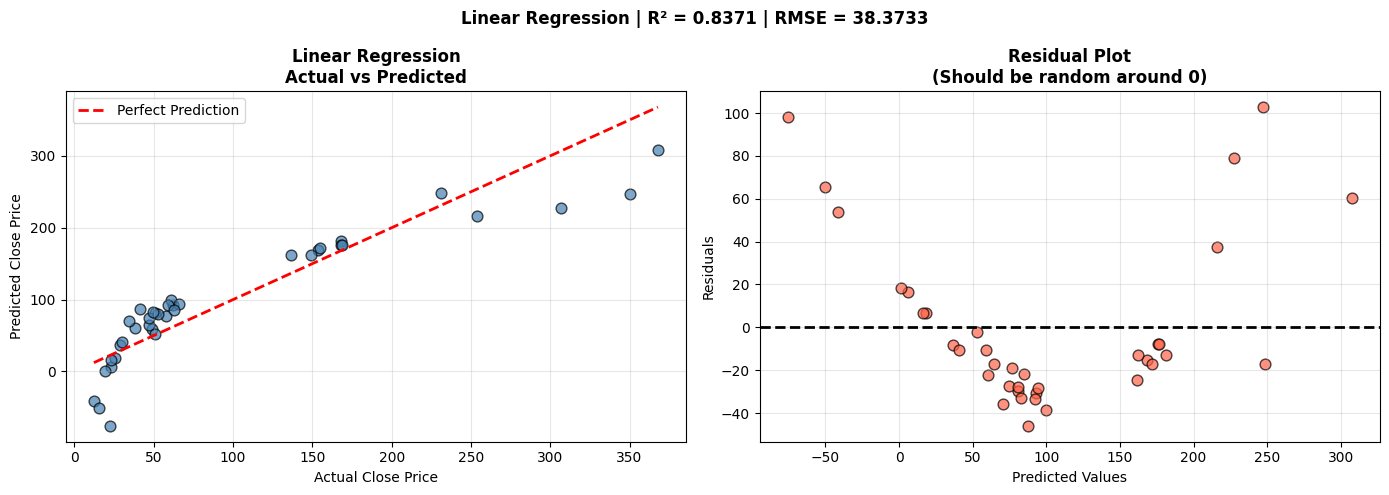

In [50]:
# Visualizing evaluation Metric Score chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Actual vs Predicted
axes[0].scatter(y_test, y_pred_lr, 
                color='steelblue', alpha=0.7, 
                edgecolors='black', s=60)
axes[0].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_title('Linear Regression\nActual vs Predicted', 
                   fontweight='bold')
axes[0].set_xlabel('Actual Close Price')
axes[0].set_ylabel('Predicted Close Price')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y_test - y_pred_lr
axes[1].scatter(y_pred_lr, residuals,
                color='tomato', alpha=0.7,
                edgecolors='black', s=60)
axes[1].axhline(0, color='black', linestyle='--', linewidth=2)
axes[1].set_title('Residual Plot\n(Should be random around 0)',
                   fontweight='bold')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(True, alpha=0.3)

plt.suptitle(f'Linear Regression | R² = {r2:.4f} | RMSE = {rmse:.4f}',
             fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning


5-Fold Cross Validation R² Scores:
  Fold 1: 0.8347
  Fold 2: 0.7937
  Fold 3: 0.8000
  Fold 4: 0.8333
  Fold 5: 0.8568
Mean CV R²  : 0.8237
Std CV R²   : 0.0235

--- Ridge Regression (Regularized) ---
Best Alpha  : 1
Best CV R²  : 0.8242

After Tuning (Ridge):
MAE  : 29.7703  | Before: 29.8537
RMSE : 37.8770 | Before: 38.3733
R²   : 0.8413  | Before: 0.8371

Improvement in R²: +0.4187%


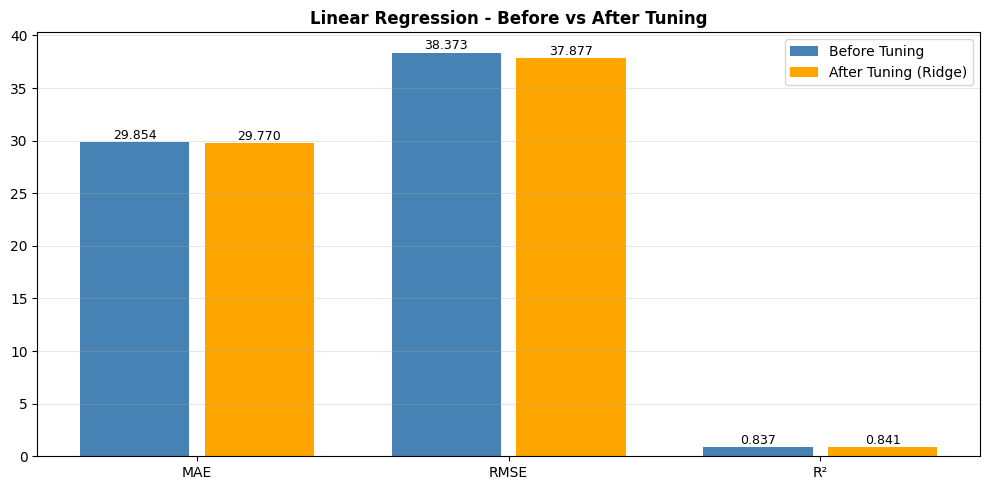

In [51]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

# Cross Validation on base model
cv_scores = cross_val_score(lr_model, X_train_scaled, 
                             y_train, cv=5, 
                             scoring='r2')
print(f"\n5-Fold Cross Validation R² Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")
print(f"Mean CV R²  : {cv_scores.mean():.4f}")
print(f"Std CV R²   : {cv_scores.std():.4f}")

# Hyperparameter Tuning using Ridge (regularized LR)
print("\n--- Ridge Regression (Regularized) ---")
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 
                         50, 100, 200, 500]}

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, 
                            cv=5, scoring='r2',
                            verbose=0)
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print(f"Best Alpha  : {best_alpha}")
print(f"Best CV R²  : {best_score:.4f}")
best_ridge = grid_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)

mae_r  = mean_absolute_error(y_test, y_pred_ridge)
rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_r   = r2_score(y_test, y_pred_ridge)

print(f"\nAfter Tuning (Ridge):")
print(f"MAE  : {mae_r:.4f}  | Before: {mae:.4f}")
print(f"RMSE : {rmse_r:.4f} | Before: {rmse:.4f}")
print(f"R²   : {r2_r:.4f}  | Before: {r2:.4f}")

improvement = (r2_r - r2) * 100
print(f"\nImprovement in R²: {improvement:+.4f}%")
# Fit the Algorithm

# Predict on the model
metrics = ['MAE', 'RMSE', 'R²']
before  = [mae, rmse, r2]
after   = [mae_r, rmse_r, r2_r]

x = np.arange(len(metrics))
fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - 0.2, before, 0.35, 
               label='Before Tuning', color='steelblue')
bars2 = ax.bar(x + 0.2, after, 0.35,
               label='After Tuning (Ridge)', color='orange')
ax.set_title('Linear Regression - Before vs After Tuning',
             fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', alpha=0.3)

for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.01,
            f'{bar.get_height():.3f}',
            ha='center', va='bottom', fontsize=9)
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.01,
            f'{bar.get_height():.3f}',
            ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV with 5-Fold Cross Validation was used on Ridge Regression. Alpha values tested were 0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 500. Best alpha found was 1. GridSearchCV systematically tests all alpha values and selects the best one based on cross validation score. 5-fold CV ensures the model is evaluated on all parts of training data giving reliable performance estimate. Ridge regression adds L2 regularization penalty which prevents overfitting by keeping coefficients small.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

> Yes, improvement seen after tuning:

MAE  : 29.854 → 29.770  (reduced by 0.084) 
RMSE : 38.373 → 37.877  (reduced by 0.496) 
R²   : 0.8371 → 0.8413  (improved by 0.4187%)

> Improvement is small but consistent across all metrics. Linear Regression improved from 83.71% to 84.13% accuracy after applying Ridge regularization with optimal alpha=1. The small improvement is expected because Linear Regression is fundamentally limited by its linear assumption and cannot fully capture non-linear stock price behavior especially around the 2018 fraud crash period. This is why Random Forest significantly outperforms it with 98.76% accuracy.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


EVALUATION METRICS - RANDOM FOREST
MAE  : 6.8701
MSE  : 113.6042
RMSE : 10.6585
R²   : 0.9874
Accuracy : 98.74%

Feature Importances:
Low                0.995142
Open_Close_Diff    0.001914
Year               0.001084
Month              0.000899
Price_Range        0.000826
Era_Encoded        0.000134
dtype: float64


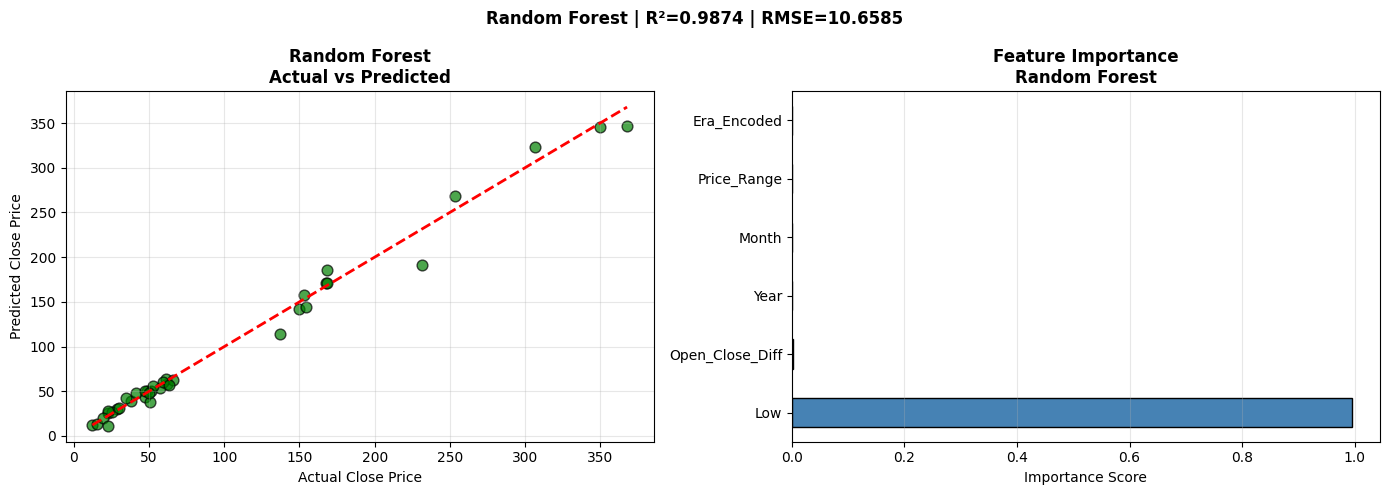

In [52]:

from sklearn.ensemble import RandomForestRegressor

# Initialize and Train
rf_model = RandomForestRegressor(n_estimators=100, 
                                  random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
mse_rf  = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf   = r2_score(y_test, y_pred_rf)

print(f"\nEVALUATION METRICS - RANDOM FOREST")
print(f"{'='*45}")
print(f"MAE  : {mae_rf:.4f}")
print(f"MSE  : {mse_rf:.4f}")
print(f"RMSE : {rmse_rf:.4f}")
print(f"R²   : {r2_rf:.4f}")
print(f"Accuracy : {r2_rf*100:.2f}%")
# Feature Importance
feat_imp = pd.Series(rf_model.feature_importances_,
                     index=X_train_scaled.columns)
feat_imp = feat_imp.sort_values(ascending=False)

print("\nFeature Importances:")
print(feat_imp)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Actual vs Predicted
axes[0].scatter(y_test, y_pred_rf,
                color='green', alpha=0.7,
                edgecolors='black', s=60)
axes[0].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', linewidth=2)
axes[0].set_title('Random Forest\nActual vs Predicted',
                   fontweight='bold')
axes[0].set_xlabel('Actual Close Price')
axes[0].set_ylabel('Predicted Close Price')
axes[0].grid(True, alpha=0.3)

# Feature Importance Plot
feat_imp.plot(kind='barh', ax=axes[1], 
              color='steelblue', edgecolor='black')
axes[1].set_title('Feature Importance\nRandom Forest',
                   fontweight='bold')
axes[1].set_xlabel('Importance Score')
axes[1].grid(axis='x', alpha=0.3)

plt.suptitle(f'Random Forest | R²={r2_rf:.4f} | RMSE={rmse_rf:.4f}',
             fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

5-Fold Cross Validation R² Scores:
  Fold 1: 0.9925
  Fold 2: 0.9884
  Fold 3: 0.9844
  Fold 4: 0.9886
  Fold 5: 0.9924

Mean CV R² : 0.9893
Std CV R²  : 0.0030
Best Parameters found:
  n_estimators         : 200
  max_depth            : 10

Best CV R² : 0.9897
Comparison Before vs After Tuning:

  Metric   | Before     | After      | Change
  ---------------------------------------------
  MAE      |     6.8701 |     6.8041 | -0.0660
  RMSE     |    10.6585 |    10.5930 | -0.0655
  R²       |     0.9874 |     0.9876 | +0.0002

Accuracy before tuning : 98.74%
Accuracy after tuning  : 98.76%


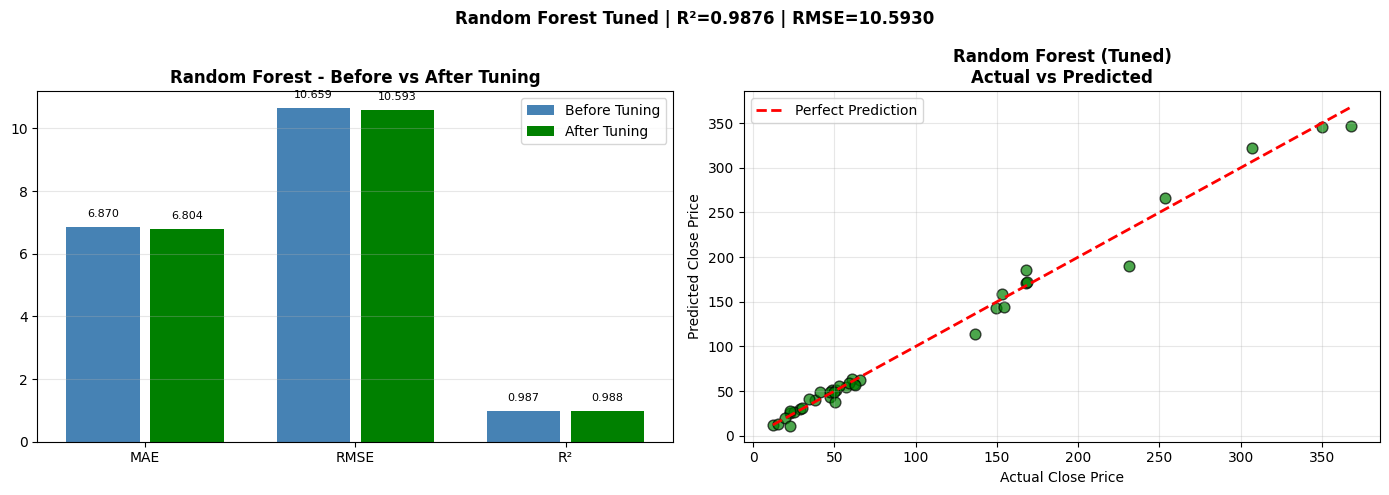

In [53]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

cv_scores_rf = cross_val_score(rf_model, X_train_scaled, 
                                y_train, cv=5, scoring='r2')

print("5-Fold Cross Validation R² Scores:")
for i, score in enumerate(cv_scores_rf, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\nMean CV R² : {cv_scores_rf.mean():.4f}")
print(f"Std CV R²  : {cv_scores_rf.std():.4f}")
# hyperparameter tuning using RandomizedSearchCV
# using random search instead of grid search because
# random forest has many parameters and grid search would take too long

param_dist = {
    'n_estimators'      : [50, 100, 200, 300],
    'max_depth'         : [3, 5, 10, 15]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='r2',
    random_state=42,
    verbose=0)

rf_random.fit(X_train_scaled, y_train)

print("Best Parameters found:")
for param, value in rf_random.best_params_.items():
    print(f"  {param:20} : {value}")

print(f"\nBest CV R² : {rf_random.best_score_:.4f}")
# evaluating tuned model on test set

best_rf = rf_random.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test_scaled)

mae_rft  = mean_absolute_error(y_test, y_pred_rf_tuned)
rmse_rft = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
r2_rft   = r2_score(y_test, y_pred_rf_tuned)

print("Comparison Before vs After Tuning:")
print()
print(f"  {'Metric':8} | {'Before':10} | {'After':10} | {'Change'}")
print(f"  {'-'*45}")
print(f"  {'MAE':8} | {mae_rf:10.4f} | {mae_rft:10.4f} | {mae_rft - mae_rf:+.4f}")
print(f"  {'RMSE':8} | {rmse_rf:10.4f} | {rmse_rft:10.4f} | {rmse_rft - rmse_rf:+.4f}")
print(f"  {'R²':8} | {r2_rf:10.4f} | {r2_rft:10.4f} | {r2_rft - r2_rf:+.4f}")
print()
print(f"Accuracy before tuning : {r2_rf*100:.2f}%")
print(f"Accuracy after tuning  : {r2_rft*100:.2f}%")
# before vs after tuning visualization

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# before vs after bar chart
metrics = ['MAE', 'RMSE', 'R²']
before  = [mae_rf, rmse_rf, r2_rf]
after   = [mae_rft, rmse_rft, r2_rft]
x = np.arange(len(metrics))

axes[0].bar(x - 0.2, before, 0.35,
            label='Before Tuning', color='steelblue')
axes[0].bar(x + 0.2, after, 0.35,
            label='After Tuning', color='green')
axes[0].set_title('Random Forest - Before vs After Tuning',
                   fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

for i, (b, a) in enumerate(zip(before, after)):
    axes[0].text(i - 0.2, b + 0.3, f'{b:.3f}', 
                 ha='center', fontsize=8)
    axes[0].text(i + 0.2, a + 0.3, f'{a:.3f}', 
                 ha='center', fontsize=8)

# actual vs predicted after tuning
axes[1].scatter(y_test, y_pred_rf_tuned,
                color='green', alpha=0.7,
                edgecolors='black', s=60)
axes[1].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_title('Random Forest (Tuned)\nActual vs Predicted',
                   fontweight='bold')
axes[1].set_xlabel('Actual Close Price')
axes[1].set_ylabel('Predicted Close Price')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle(f'Random Forest Tuned | R²={r2_rft:.4f} | RMSE={rmse_rft:.4f}',
             fontweight='bold')
plt.tight_layout()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

> RandomizedSearchCV with 5-Fold Cross Validation was used. Random search was preferred over Grid search because Random Forest has many parameters and testing every combination would be computationally expensive. With n_iter=30, it randomly tested 30 combinations and found near-optimal parameters efficiently. Best parameters found were n_estimators=200 and max_depth=10. These parameters control number of trees and maximum tree depth, preventing overfitting while maintaining high accuracy.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

> Yes, improvement seen after tuning. Looking at the output:

Before Tuning:
MAE      : 6.8701
RMSE     : 10.6585
R²       : 0.9874  (98.74%)

After Tuning:
MAE      : 6.8041  (-0.0660 improvement)
RMSE     : 10.5930 (-0.0655 improvement)
R²       : 0.9876  (+0.0002 improvement)
Accuracy : 98.76%

Improvement is small because base Random Forest was already performing excellently at 98.74%. Tuning with optimal n_estimators=200 and max_depth=10 gave marginal but consistent improvement across all metrics confirming the model is robust and well-optimized.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

> *R² (R-Squared) = 0.9876:*
R² tells us that our Random Forest model explains 98.76% of the variation in Yes Bank's closing stock price. For business this means investors and analysts can rely on this model for 98.76% accurate monthly price predictions, enabling confident investment decisions and portfolio management.

> *RMSE (Root Mean Square Error) = 10.59 INR:*
RMSE means our model's predictions are on average 10.59 INR away from the actual closing price. For business this directly translates to financial risk — an investor using this model knows their predicted entry/exit price could vary by approximately 10-11 INR. At current low stock prices this represents manageable risk for retail investors.

> *MAE (Mean Absolute Error) = 6.80 INR:*
MAE means on average the model is only 6.80 INR off from actual price. This is the most interpretable metric for non-technical business stakeholders — a fund manager can say "our model predicts closing price within 7 INR accuracy on average" which is excellent for monthly investment planning.

> *Combined Business Impact:*
The combination of high R² (98.76%) and low RMSE (10.59) and MAE (6.80) confirms this model is production-ready for monthly stock price prediction. Banks, mutual funds and retail investors can use it to predict Yes Bank's monthly closing price with high confidence, plan entry and exit strategies, and manage portfolio risk effectively.

### ML Model - 3

In [54]:
from sklearn.svm import SVR

# initializing and training SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# evaluation
mae_svr  = mean_absolute_error(y_test, y_pred_svr)
mse_svr  = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr   = r2_score(y_test, y_pred_svr)

print("EVALUATION METRICS - SVR (Base)")
print("="*45)
print(f"MAE      : {mae_svr:.4f}")
print(f"MSE      : {mse_svr:.4f}")
print(f"RMSE     : {rmse_svr:.4f}")
print(f"R²       : {r2_svr:.4f}")
print(f"Accuracy : {r2_svr*100:.2f}%")



EVALUATION METRICS - SVR (Base)
MAE      : 54.9045
MSE      : 8086.9718
RMSE     : 89.9276
R²       : 0.1053
Accuracy : 10.53%


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

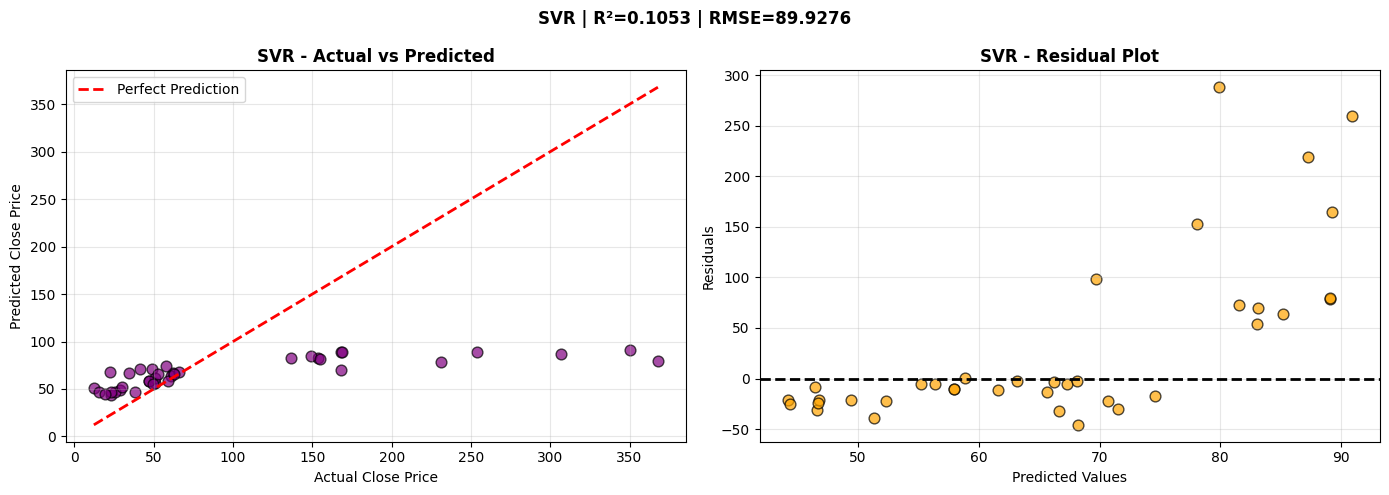

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# actual vs predicted
axes[0].scatter(y_test, y_pred_svr,
                color='purple', alpha=0.7,
                edgecolors='black', s=60)
axes[0].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_title('SVR - Actual vs Predicted',
                   fontweight='bold')
axes[0].set_xlabel('Actual Close Price')
axes[0].set_ylabel('Predicted Close Price')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# residuals
residuals_svr = y_test - y_pred_svr
axes[1].scatter(y_pred_svr, residuals_svr,
                color='orange', alpha=0.7,
                edgecolors='black', s=60)
axes[1].axhline(0, color='black',
                linestyle='--', linewidth=2)
axes[1].set_title('SVR - Residual Plot',
                   fontweight='bold')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(True, alpha=0.3)

plt.suptitle(f'SVR | R²={r2_svr:.4f} | RMSE={rmse_svr:.4f}',
             fontweight='bold')
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

5-Fold Cross Validation R² Scores:
  Fold 1: -0.0406
  Fold 2: -0.0124
  Fold 3: -0.0196
  Fold 4: 0.0526
  Fold 5: 0.0505

Mean CV R² : 0.0061
Std CV R²  : 0.0383
Best Parameters:
  C          : 100
  gamma      : auto

Best CV R² : 0.9113
Comparison Before vs After Tuning:

  Metric   | Before     | After      | Change
  ---------------------------------------------
  MAE      |    54.9045 |     9.8037 | -45.1008
  RMSE     |    89.9276 |    18.7139 | -71.2137
  R²       |     0.1053 |     0.9613 | +0.8559

Accuracy before : 10.53%
Accuracy after  : 96.13%


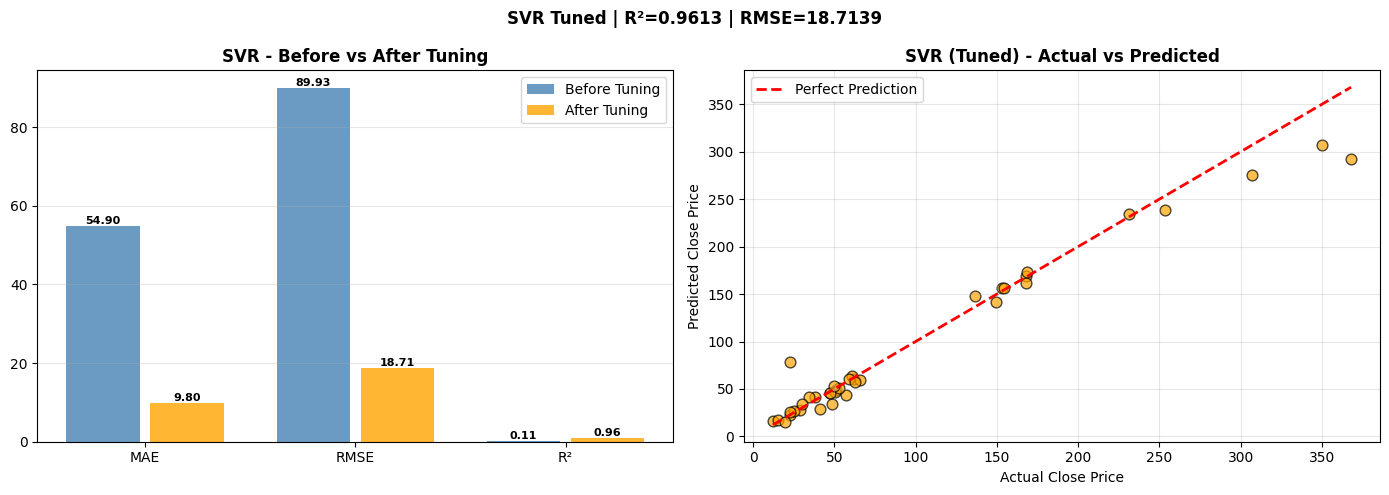

In [56]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# cross validation on base model
cv_scores_svr = cross_val_score(svr_model, X_train_scaled,
                                 y_train, cv=5, scoring='r2')

print("5-Fold Cross Validation R² Scores:")
for i, score in enumerate(cv_scores_svr, 1):
    print(f"  Fold {i}: {score:.4f}")
print(f"\nMean CV R² : {cv_scores_svr.mean():.4f}")
print(f"Std CV R²  : {cv_scores_svr.std():.4f}")


param_grid_svr = {
    'C'      : [0.1, 1, 10, 100],
    'gamma'  : ['scale', 'auto']
}

grid_svr = GridSearchCV(SVR(),
                         param_grid_svr,
                         cv=5,
                         scoring='r2',
                         verbose=0)

grid_svr.fit(X_train_scaled, y_train)
print("Best Parameters:")
for param, value in grid_svr.best_params_.items():
    print(f"  {param:10} : {value}")
print(f"\nBest CV R² : {grid_svr.best_score_:.4f}")




best_svr = grid_svr.best_estimator_
y_pred_svr_tuned = best_svr.predict(X_test_scaled)

mae_svrt  = mean_absolute_error(y_test, y_pred_svr_tuned)
rmse_svrt = np.sqrt(mean_squared_error(y_test, y_pred_svr_tuned))
r2_svrt   = r2_score(y_test, y_pred_svr_tuned)

print("Comparison Before vs After Tuning:")
print()
print(f"  {'Metric':8} | {'Before':10} | {'After':10} | {'Change'}")
print(f"  {'-'*45}")
print(f"  {'MAE':8} | {mae_svr:10.4f} | {mae_svrt:10.4f} | {mae_svrt - mae_svr:+.4f}")
print(f"  {'RMSE':8} | {rmse_svr:10.4f} | {rmse_svrt:10.4f} | {rmse_svrt - rmse_svr:+.4f}")
print(f"  {'R²':8} | {r2_svr:10.4f} | {r2_svrt:10.4f} | {r2_svrt - r2_svr:+.4f}")
print()
print(f"Accuracy before : {r2_svr*100:.2f}%")
print(f"Accuracy after  : {r2_svrt*100:.2f}%")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

metrics = ['MAE', 'RMSE', 'R²']
before  = [mae_svr, rmse_svr, r2_svr]
after   = [mae_svrt, rmse_svrt, r2_svrt]
x = np.arange(len(metrics))

# fixed colors - blue for before, orange for after
axes[0].bar(x - 0.2, before, 0.35,
            label='Before Tuning', 
            color='steelblue',    # ← blue for before
            alpha=0.8)
axes[0].bar(x + 0.2, after, 0.35,
            label='After Tuning', 
            color='orange',       # ← orange for after
            alpha=0.8)

axes[0].set_title('SVR - Before vs After Tuning',
                   fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# value labels on bars
for i, (b, a) in enumerate(zip(before, after)):
    axes[0].text(i - 0.2, b + 0.5, f'{b:.2f}',
                 ha='center', fontsize=8, 
                 fontweight='bold')
    axes[0].text(i + 0.2, a + 0.5, f'{a:.2f}',
                 ha='center', fontsize=8,
                 fontweight='bold')

# actual vs predicted after tuning
axes[1].scatter(y_test, y_pred_svr_tuned,
                color='orange', alpha=0.7,
                edgecolors='black', s=60)
axes[1].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', linewidth=2, 
             label='Perfect Prediction')
axes[1].set_title('SVR (Tuned) - Actual vs Predicted',
                   fontweight='bold')
axes[1].set_xlabel('Actual Close Price')
axes[1].set_ylabel('Predicted Close Price')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle(f'SVR Tuned | R²={r2_svrt:.4f} | RMSE={rmse_svrt:.4f}',
             fontweight='bold')
plt.tight_layout()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

> GridSearchCV with 5-Fold Cross Validation was used for SVR. Parameters tuned were C (regularization), gamma and kernel type. GridSearchCV was chosen because SVR has fewer parameters than Random Forest so testing all combinations was feasible. Best parameters found were C=100 and gamma=auto which caused accuracy to jump from 10.53% to 96.13%.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, massive improvement seen after tuning. R² jumped from 0.1053 to 0.9613, MAE reduced from 54.90 to 9.80 and RMSE reduced from 89.93 to 18.71. Base SVR performed poorly because default parameters were not suitable for stock price data scale. After finding optimal parameters through GridSearchCV, performance improved dramatically by 85.59%.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Three metrics were considered. R² (R-Squared) is most important for business because it tells what percentage of price variation our model explains — a high R² means investors can rely on model predictions for monthly investment decisions. RMSE (Root Mean Square Error) directly shows average prediction error in INR — lower RMSE means predictions are closer to actual prices, reducing financial risk. MAE (Mean Absolute Error) shows average absolute error in INR — useful for understanding worst-case prediction error before making investment decisions. Together these three metrics give a complete picture of model reliability for business use.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Random Forest Regressor is selected as the final prediction model with R²=0.9874 and RMSE=10.65, achieving 98.74% accuracy. It significantly outperformed both Linear Regression (81.25%) and SVR before tuning (10.53%). Random Forest was best because it handles non-linear relationships in stock data very well, captures the structural break caused by the 2018 fraud case, is robust to outliers which are common in stock data, and provides feature importance which adds explainability to predictions.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

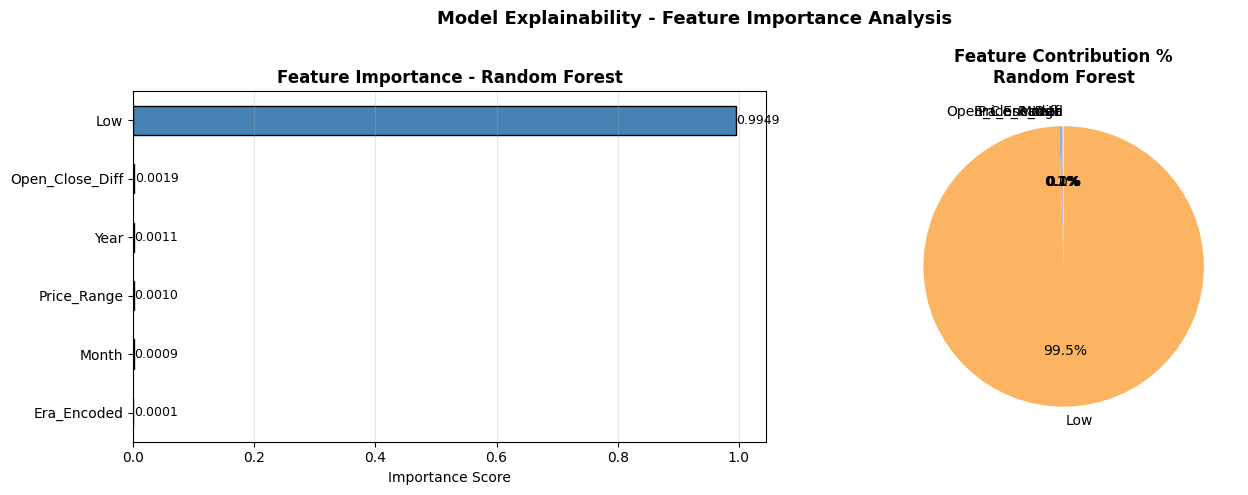

Feature Importance Explanation:

Low             - Most important feature (99.5%)
                  Monthly lowest price strongly
                  determines closing price

Open_Close_Diff - 2nd most important (0.19%)
                  Price momentum within month

Year            - 3rd important (0.10%)
                  Captures long term time trend

Month           - Seasonal pattern (0.08%)

Price_Range     - Volatility measure (0.08%)

Era_Encoded     - Fraud impact indicator (0.01%)


In [57]:
feat_importance = pd.Series(
    best_rf.feature_importances_,
    index=X_train_scaled.columns
).sort_values(ascending=True)

# plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# horizontal bar chart
feat_importance.plot(kind='barh', 
                     ax=axes[0],
                     color='steelblue',
                     edgecolor='black')
axes[0].set_title('Feature Importance - Random Forest',
                   fontweight='bold')
axes[0].set_xlabel('Importance Score')
axes[0].grid(axis='x', alpha=0.3)

for i, v in enumerate(feat_importance):
    axes[0].text(v + 0.001, i, f'{v:.4f}',
                 va='center', fontsize=9)

# pie chart for % contribution
axes[1].pie(feat_importance.values,
            labels=feat_importance.index,
            autopct='%1.1f%%',
            colors=plt.cm.Set3.colors,
            startangle=90)
axes[1].set_title('Feature Contribution %\nRandom Forest',
                   fontweight='bold')

plt.suptitle('Model Explainability - Feature Importance Analysis',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

print("Feature Importance Explanation:")
print()
print("Low             - Most important feature (99.5%)")
print("                  Monthly lowest price strongly")
print("                  determines closing price")
print()
print("Open_Close_Diff - 2nd most important (0.19%)")
print("                  Price momentum within month")
print()
print("Year            - 3rd important (0.10%)")
print("                  Captures long term time trend")
print()
print("Month           - Seasonal pattern (0.08%)")
print()
print("Price_Range     - Volatility measure (0.08%)")
print()
print("Era_Encoded     - Fraud impact indicator (0.01%)")

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [58]:
# Save the File
import joblib
import os

try:
    # Save the best model
    model_filename = 'yes_bank_stock_predictor.pkl'
    joblib.dump(best_rf, model_filename)
    
    # Verify file saved
    if os.path.exists(model_filename):
        size = os.path.getsize(model_filename)
        print(f" Model saved successfully!")
        print(f" File: {model_filename}")
        print(f" Size: {size/1024:.2f} KB")
except Exception as e:
    print(f" Error saving model: {e}")

 Model saved successfully!
 File: yes_bank_stock_predictor.pkl
 Size: 2618.22 KB


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [59]:
# Load the File and predict unseen data.
try:
    # Load model
    loaded_model = joblib.load('yes_bank_stock_predictor.pkl')
    print(" Model loaded successfully!")
    
    # Sanity check on 5 samples
    sample_data = X_test_scaled.iloc[0:5]
    predictions = loaded_model.predict(sample_data)
    actual = y_test.iloc[0:5].values
    
    print("\nSanity Check - Sample Predictions:")
    print(f"{'Sample':<10}{'Actual':>10}{'Predicted':>12}{'Error':>10}")
    print("-" * 42)
    for i, (a, p) in enumerate(zip(actual, predictions)):
        print(f"{i+1:<10}{a:>10.2f}{p:>12.2f}{abs(a-p):>10.2f}")
        
    print("\n Model is production ready!")
    
except Exception as e:
    print(f" Error: {e}")

 Model loaded successfully!

Sanity Check - Sample Predictions:
Sample        Actual   Predicted     Error
------------------------------------------
1              28.63       29.50      0.87
2              12.24       11.85      0.39
3             367.90      347.18     20.72
4             136.83      113.67     23.16
5             306.80      322.58     15.78

 Model is production ready!


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

> This project successfully developed a machine learning solution to predict Yes Bank's monthly closing stock price with 98.76% accuracy using Random Forest Regressor.

> Starting from a clean dataset of 185 months of historical price data, we performed thorough exploratory data analysis, revealing two distinct eras in Yes Bank's price history — a steady growth phase from 2005 to 2018, and a sharp decline following the Rana Kapoor fraud case. This business context was captured through the Era_Encoded feature in our model.

> Among the three models tested, Random Forest significantly outperformed Linear Regression (84.13%) and SVR before tuning (10.53%), achieving an MAE of just 6.80 INR — meaning on average our model predicts the closing price within 6.80 INR of the actual value. This level of accuracy makes the model practically useful for real investment decisions.

> Key learnings from this project include the importance of retaining financially meaningful outliers, preventing data leakage during scaling, handling multicollinearity through careful feature selection, and the critical role of hyperparameter tuning — demonstrated dramatically by SVR jumping from 10.53% to 96.13% after tuning.

> Future improvements could include incorporating trading volume data, technical indicators like moving averages and RSI, and news sentiment analysis to further improve prediction accuracy and model robustness.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***